# Simulation Tandem

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from pathlib import Path
import os
from tqdm import tqdm
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
load_dotenv('env.txt')

True

In [2]:
target = Path(os.getenv("tandem_path"))

In [3]:
assembly_df = pd.read_csv(target.joinpath("assembly_summary_newdb.txt.gz"), delimiter="\t")
assembly_df

,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
0,GCF_000762265.1,2449987,2445,2386,55,41.5,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea
1,GCF_001458655.1,2494510,2462,2404,55,41.0,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea
2,GCF_002813085.1,1805545,1782,1715,43,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
3,GCF_022846155.1,1791153,1738,1680,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
4,GCF_022846175.1,1791155,1739,1681,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
...,...,...,...,...,...,...,...,...,...,...,...
118097,GCA_037114785.1,42928,na,na,na,35.0,3127874,Enterococcus phage vB_Efa_ZAT1,NaN,NaN,Viruses
118098,GCA_037114795.1,18740,na,na,na,37.5,3127946,Bacillus phage vB_Bsu_hmny1,NaN,NaN,Viruses
118099,GCA_037114805.1,18762,na,na,na,37.5,3127947,Bacillus phage vB_Bsu_hmny2,NaN,NaN,Viruses
118100,GCA_037114815.1,43533,na,na,na,43.5,3127948,Vibrio phage Va-ZX-1,NaN,NaN,Viruses


In [4]:
extract_id = lambda accession: '_'.join(Path(accession).name.split('_')[:2])

In [10]:
filtered_simulation = {extract_id(ext) for ext in target.parent.joinpath("tandem_simulation_out", "filtered_accessions").glob("*.snappy")}
filtered_tandem = {extract_id(ext) for ext in target.parent.joinpath("tandem_out", "filtered_accessions").glob("*.snappy")}

len(filtered_simulation), len(filtered_tandem)

(111846, 117253)

In [12]:
mutual = filtered_simulation.intersection(filtered_tandem)
len(mutual)

111063

In [6]:
df_tandem = pd.read_parquet(target.joinpath("tandem_all.parquet.snappy"), engine="fastparquet")\
                    .merge(assembly_df, 
                           left_index=True, 
                           right_on="#assembly_accession", 
                           how="left"
                          )
df_tandem

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
61159,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,NZ_OY986433.1,3066044,3066055,12,3,4,gct,gctgctgctgct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3069465,3069474,10,2,5,ct,ctctctctct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3079507,3079518,12,3,4,gcc,gccgccgccgcc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3080548,3080559,12,3,4,cgg,cggcggcggcgg,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [13]:
df_tandem = df_tandem[df_tandem['#assembly_accession'].isin(mutual)]
df_tandem

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
61159,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,NZ_OY986433.1,3066044,3066055,12,3,4,gct,gctgctgctgct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3069465,3069474,10,2,5,ct,ctctctctct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3079507,3079518,12,3,4,gcc,gccgccgccgcc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3080548,3080559,12,3,4,cgg,cggcggcggcgg,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [7]:
df_simie = pd.read_parquet(target.joinpath("simulation_tandem_all.parquet.snappy"), engine="fastparquet")\
                    .merge(assembly_df, 
                           left_index=True, 
                           right_on="#assembly_accession", 
                           how="left")
df_simie

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
61159,AE009951.2,6722,6733,12,4,3,tatt,tatttatttatt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,8822,8833,12,4,3,atct,atctatctatct,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,15756,15767,12,4,3,acag,acagacagacag,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,16267,16276,10,1,10,a,aaaaaaaaaa,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,22015,22024,10,1,10,t,tttttttttt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,NZ_OY986433.1,3023026,3023035,10,2,5,cg,cgcgcgcgcg,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3028452,3028463,12,3,4,gct,gctgctgctgct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3040976,3040987,12,3,4,gcc,gccgccgccgcc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3064033,3064042,10,1,10,c,cccccccccc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [14]:
df_simie = df_simie[df_simie['#assembly_accession'].isin(mutual)]
df_simie

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
61159,AE009951.2,6722,6733,12,4,3,tatt,tatttatttatt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,8822,8833,12,4,3,atct,atctatctatct,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,15756,15767,12,4,3,acag,acagacagacag,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,16267,16276,10,1,10,a,aaaaaaaaaa,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
61159,AE009951.2,22015,22024,10,1,10,t,tttttttttt,GCA_000007325.1,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,NZ_OY986433.1,3023026,3023035,10,2,5,cg,cgcgcgcgcg,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3028452,3028463,12,3,4,gct,gctgctgctgct,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3040976,3040987,12,3,4,gcc,gccgccgccgcc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
36057,NZ_OY986433.1,3064033,3064042,10,1,10,c,cccccccccc,GCF_963920505.1,3085273,3279,3181,54,66.0,2789857,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [19]:
empty_simie = mutual - set(df_simie['#assembly_accession'])
empty_tandem = mutual - set(df_tandem['#assembly_accession'])
len(empty_tandem), len(empty_simie)

(17347, 22977)

In [20]:
cols = ["#assembly_accession", "organism_name", "genome_size", "gc_percent", "phylum", "kingdom", "superkingdom"]

empty_simie_df = pd.DataFrame(empty_simie, columns=['#assembly_accession'])\
                            .merge(assembly_df[cols], on="#assembly_accession", how="left")
empty_tandem_df = pd.DataFrame(empty_tandem, columns=['#assembly_accession'])\
                            .merge(assembly_df[cols], on="#assembly_accession", how="left")

In [21]:
empty_tandem_df

,#assembly_accession,organism_name,genome_size,gc_percent,phylum,kingdom,superkingdom
0,GCF_018588985.1,Hancheng leafhopper mivirus,9852,47.0,Negarnaviricota,Orthornavirae,Viruses
1,GCA_003821815.1,Microviridae sp.,5025,42.5,Phixviricota,Sangervirae,Viruses
2,GCA_902995525.1,uncultured Caudovirales phage,40592,49.0,Uroviricota,Heunggongvirae,Viruses
3,GCA_003406015.1,Microviridae sp.,4172,40.5,Phixviricota,Sangervirae,Viruses
4,GCA_003404635.1,Microviridae sp.,4153,43.5,Phixviricota,Sangervirae,Viruses
...,...,...,...,...,...,...,...
17342,GCF_000897035.1,Cotton leaf curl betasatellite,1436,39.5,NaN,Unclassified Viruses,Viruses
17343,GCA_003404735.1,Microviridae sp.,4273,48.5,Phixviricota,Sangervirae,Viruses
17344,GCA_004071875.1,Porcine circovirus 2,1767,48.5,Cressdnaviricota,Shotokuvirae,Viruses
17345,GCA_031578455.1,Orthobunyavirus akabaneense,12081,37.0,Negarnaviricota,Orthornavirae,Viruses


In [22]:
empty_tandem_df.to_csv(target.joinpath("empty_tandem.csv"), index=False, mode="w")
empty_simie_df.to_csv(target.joinpath("empty_simie_tandem.csv"), index=False, mode="w")

In [208]:
df_tandem.head()

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom,AT_content
0,GCA_000007325.1,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,8
1,GCA_000007325.1,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,8
2,GCA_000007325.1,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,12
3,GCA_000007325.1,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,8
4,GCA_000007325.1,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,2174500,2067,2067,0,27.0,851,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,8


In [237]:
total_tandem_repeats = df_tandem.groupby(["kingdom", "sru"], as_index=False).agg(total_tandem=("consensus", "count"))
total_tandem_repeats

,kingdom,sru,total_tandem
0,Animalia,1,10711039
1,Animalia,2,7992392
2,Animalia,3,2994223
3,Animalia,4,6283941
4,Animalia,5,9590667
...,...,...,...
135,Zilligvirae,4,29
136,Zilligvirae,5,6
137,Zilligvirae,6,5
138,Zilligvirae,8,6


In [243]:
tandem_grouped_repeats = df_tandem.query("superkingdom != 'Viruses'").groupby(["kingdom", "sru", "consensus_repeats"], as_index=False)\
                .agg({"consensus": "count"})\
                .merge(total_tandem_repeats, on=["kingdom", "sru"], how="left")

tandem_grouped_repeats.loc[:, "perc"] = 1e2 * tandem_grouped_repeats["consensus"].div(tandem_grouped_repeats["total_tandem"])
tandem_grouped_repeats = tandem_grouped_repeats.sort_values(by=['kingdom', 'sru', 'consensus_repeats'], ascending=False)
tandem_grouped_repeats

,kingdom,sru,consensus_repeats,consensus,total_tandem,perc
6513,Protista,9,33,1,3532,0.028313
6512,Protista,9,26,3,3532,0.084938
6511,Protista,9,24,1,3532,0.028313
6510,Protista,9,22,1,3532,0.028313
6509,Protista,9,21,1,3532,0.028313
...,...,...,...,...,...,...
4,Animalia,1,14,778830,10711039,7.271283
3,Animalia,1,13,902764,10711039,8.428351
2,Animalia,1,12,1088489,10711039,10.162310
1,Animalia,1,11,1488032,10711039,13.892508


In [244]:
kingdoms = tandem_grouped_repeats['kingdom'].unique()
kingdoms

array(['Protista', 'Plantae', 'Fungi', 'Eubacteria', 'Archaeabacteria',
       'Animalia'], dtype=object)

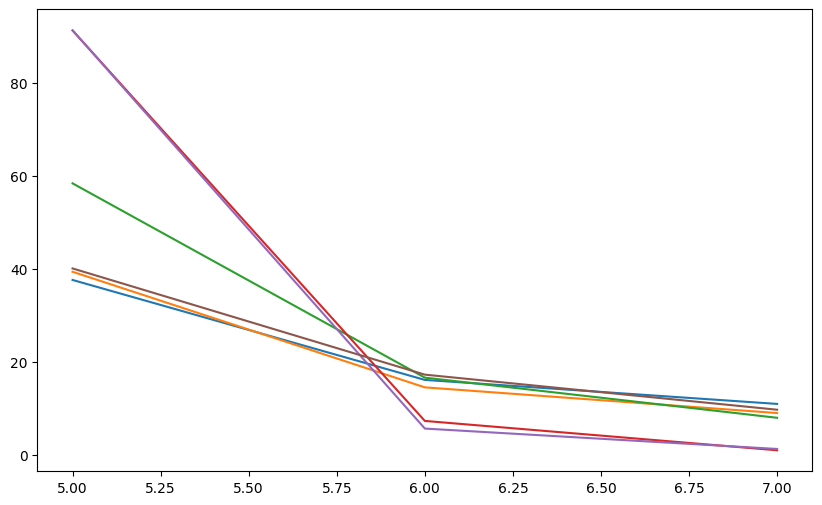

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for domain in kingdoms:
    temp = tandem_grouped_repeats.query(f"kingdom == '{domain}' & sru == 2 & consensus_repeats < 8")
    ax.plot(temp['consensus_repeats'], temp['perc'])
    
plt.show()

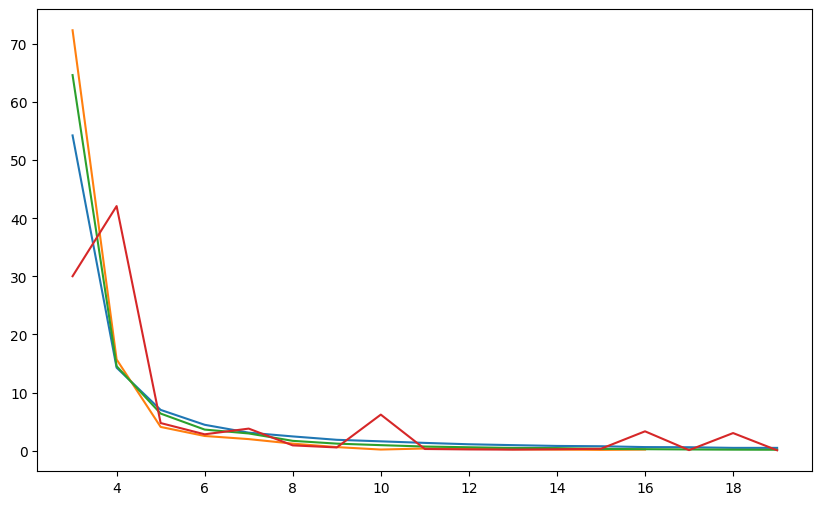

In [236]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

domains = ['Eukaryota', 'Archaea', 'Bacteria', 'Viruses']
for domain in domains:
    temp = tandem_grouped_repeats.query(f"superkingdom == '{domain}' & sru == 9 & consensus_repeats < 20")
    ax.plot(temp['consensus_repeats'], temp['perc'])
plt.show()

# Keep only assemblies that are contained in both

In [26]:
tandem_grouped = df_tandem.groupby("#assembly_accession", as_index=False)\
                    .agg({"length": "sum", 
                          "genome_size": "first", 
                          "superkingdom": "first", 
                          "phylum": "first", 
                          "organism_name": "first", 
                          "kingdom": "first",
                          "consensus": "count",
                         })\
                    .rename(columns={"consensus": "tandemCounts"})\
                    .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']))\
                    .assign(bpDensity=lambda ds: 1e6 * ds['length'].div(ds['genome_size']))
tandem_grouped.head()

,#assembly_accession,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,tandemDensity,bpDensity
0,GCA_000007325.1,2280,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,189,86.916533,1048.516900
1,GCA_000007385.1,10023,4941439,Bacteria,Pseudomonadota,Xanthomonas oryzae pv. oryzae KACC 10331,Eubacteria,684,138.421217,2028.356517
2,GCA_000008005.1,3425,5432652,Bacteria,Bacillota,Bacillus cereus ATCC 10987,Eubacteria,270,49.699484,630.447155
3,GCA_000008085.1,371,490885,Archaea,Nanoarchaeota,Nanoarchaeum equitans Kin4-M,Archaeabacteria,32,65.188384,755.777830
4,GCA_000008885.1,3783,703004,Bacteria,Pseudomonadota,Wigglesworthia glossinidia endosymbiont of Glo...,Eubacteria,335,476.526449,5381.192710


In [27]:
tandem_grouped = df_tandem.groupby("#assembly_accession", as_index=False)\
                    .agg({"length": "sum", 
                          "genome_size": "first", 
                          "superkingdom": "first", 
                          "phylum": "first", 
                          "organism_name": "first", 
                          "kingdom": "first",
                          "consensus": "count",
                         })\
                    .rename(columns={"consensus": "tandemCounts"})\
                    .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']))\
                    .assign(bpDensity=lambda ds: 1e6 * ds['length'].div(ds['genome_size']))

simie_grouped = df_simie.groupby("#assembly_accession", as_index=False)\
                    .agg({"length": "sum", 
                          "genome_size": "first", 
                          "superkingdom": "first", 
                          "phylum": "first", 
                          "organism_name": "first", 
                          "kingdom": "first",
                          "consensus": "count",
                         })\
                    .rename(columns={"consensus": "tandemCounts"})\
                    .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']))\
                    .assign(bpDensity=lambda ds: 1e6  * ds['length'].div(ds['genome_size']))

## ADD EMPTY

columns_for_empty = ["#assembly_accession", "genome_size", "superkingdom", "phylum", "organism_name", "kingdom"]

tandem_grouped = pd.concat([tandem_grouped, empty_tandem_df[columns_for_empty]], axis=0)
tandem_grouped["bpDensity"] = tandem_grouped["bpDensity"].fillna(0.0)
tandem_grouped["tandemDensity"] = tandem_grouped["tandemDensity"].fillna(0.0)
tandem_grouped["tandemCounts"] = tandem_grouped["tandemCounts"].fillna(0.0).astype(int)

simie_grouped = pd.concat([simie_grouped, empty_simie_df[columns_for_empty]], axis=0)
simie_grouped["bpDensity"] = simie_grouped["bpDensity"].fillna(0.0)
simie_grouped["tandemDensity"] = simie_grouped["tandemDensity"].fillna(0.0)
simie_grouped["tandemCounts"] = simie_grouped["tandemCounts"].fillna(0.0).astype(int)
simie_grouped = simie_grouped.rename(columns={"length": "simulationLength",
                                              "tandemDensity": "simulationTandemDensity", 
                                              "tandemCounts": "simulationTandemCounts", 
                                              "bpDensity": "simulationbpDensity"})

In [206]:
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
tandem_grouped.sort_values(by=['tandemDensity'], ascending=False).drop_duplicates(subset=['organism_name'], keep="first").head(30)\
                            .to_csv(f"{target}/top_organisms_STR_density.csv", index=False, mode="w")

In [207]:
target

PosixPath('/storage/group/izg5139/default/external/satellites/scripts/tandem_out/figures/enrichment_simie')

In [28]:
simie_grouped.head()

,#assembly_accession,simulationLength,genome_size,superkingdom,phylum,organism_name,kingdom,simulationTandemCounts,simulationTandemDensity,simulationbpDensity
0,GCA_000007325.1,5659.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,502,230.857668,2602.437342
1,GCA_000007385.1,6395.0,4941439,Bacteria,Pseudomonadota,Xanthomonas oryzae pv. oryzae KACC 10331,Eubacteria,584,118.184197,1294.157431
2,GCA_000008005.1,5807.0,5432652,Bacteria,Bacillota,Bacillus cereus ATCC 10987,Eubacteria,523,96.269741,1068.907046
3,GCA_000008085.1,1081.0,490885,Archaea,Nanoarchaeota,Nanoarchaeum equitans Kin4-M,Archaeabacteria,95,193.528016,2202.145105
4,GCA_000008885.1,3656.0,703004,Bacteria,Pseudomonadota,Wigglesworthia glossinidia endosymbiont of Glo...,Eubacteria,325,462.301779,5200.539399


In [29]:
tandem_grouped.shape, simie_grouped.shape

((111063, 10), (111063, 10))

In [30]:
import math

In [25]:
joint_densities = tandem_grouped.merge(simie_grouped[["#assembly_accession", 
                                                      "simulationLength", 
                                                      "simulationTandemDensity", 
                                                      "simulationbpDensity", 
                                                      "simulationTandemCounts"
                                                     ]], on="#assembly_accession", how="outer")
joint_densities

,#assembly_accession,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,tandemDensity,bpDensity,simulationLength,simulationTandemDensity,simulationbpDensity,simulationTandemCounts
0,GCA_000007325.1,2280.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,189,86.916533,1048.516900,5659.0,230.857668,2602.437342,502
1,GCA_000007385.1,10023.0,4941439,Bacteria,Pseudomonadota,Xanthomonas oryzae pv. oryzae KACC 10331,Eubacteria,684,138.421217,2028.356517,6395.0,118.184197,1294.157431,584
2,GCA_000008005.1,3425.0,5432652,Bacteria,Bacillota,Bacillus cereus ATCC 10987,Eubacteria,270,49.699484,630.447155,5807.0,96.269741,1068.907046,523
3,GCA_000008085.1,371.0,490885,Archaea,Nanoarchaeota,Nanoarchaeum equitans Kin4-M,Archaeabacteria,32,65.188384,755.777830,1081.0,193.528016,2202.145105,95
4,GCA_000008885.1,3783.0,703004,Bacteria,Pseudomonadota,Wigglesworthia glossinidia endosymbiont of Glo...,Eubacteria,335,476.526449,5381.192710,3656.0,462.301779,5200.539399,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111058,GCA_031163125.1,NaN,12269,Viruses,Kitrinoviricota,Bovine viral diarrhea virus 1m,Orthornavirae,0,0.000000,0.000000,10.0,81.506235,815.062352,1
111059,GCA_030513315.1,NaN,2196,Viruses,Cressdnaviricota,Genomoviridae sp.,Shotokuvirae,0,0.000000,0.000000,NaN,0.000000,0.000000,0
111060,GCA_031259915.1,NaN,7333,Viruses,Cossaviricota,Bos taurus papillomavirus 39,Shotokuvirae,0,0.000000,0.000000,15.0,136.369835,2045.547525,1
111061,GCA_031123555.1,NaN,9784,Viruses,Pisuviricota,Plum pox virus strain Marcus,Orthornavirae,0,0.000000,0.000000,NaN,0.000000,0.000000,0


<Axes: ylabel='Frequency'>

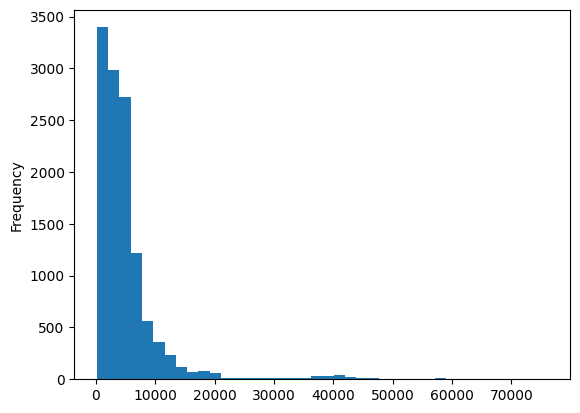

In [35]:
joint_densities.query("tandemCounts == 0 & simulationTandemCounts == 0")['genome_size'].plot(kind="hist", bins=40)

In [36]:
joint_densities = tandem_grouped.merge(simie_grouped[["#assembly_accession", 
                                                      "simulationLength", 
                                                      "simulationTandemDensity", 
                                                      "simulationbpDensity", 
                                                      "simulationTandemCounts"
                                                     ]], on="#assembly_accession", how="outer")

joint_densities = joint_densities.query("tandemCounts > 0 | simulationTandemCounts > 0")
joint_densities.loc[:, "enrichmentCounts"] = (joint_densities["tandemCounts"] - joint_densities["simulationTandemCounts"]).div(joint_densities["simulationTandemCounts"] + joint_densities["tandemCounts"])
# joint_densities.loc[:, "logEnrichmentCounts"] = joint_densities["enrichmentCounts"].apply(lambda y: math.log(y, 10))

joint_densities.loc[:, "enrichmentbp"] = (joint_densities["bpDensity"]-joint_densities["simulationbpDensity"]).div(joint_densities["bpDensity"] + joint_densities["simulationbpDensity"])
# joint_densities.loc[:, "logEnrichmentbp"] = joint_densities["enrichmentbp"].apply(lambda y: math.log(y, 10))

sorted_densities = joint_densities #[joint_densities['enrichmentCounts'] < float('inf')].sort_values(by=['enrichmentCounts'], ascending=False)
sorted_densities

,#assembly_accession,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,tandemDensity,bpDensity,simulationLength,simulationTandemDensity,simulationbpDensity,simulationTandemCounts,enrichmentCounts,enrichmentbp
0,GCA_000007325.1,2280.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,189,86.916533,1048.516900,5659.0,230.857668,2602.437342,502,-0.452967,-0.425620
1,GCA_000007385.1,10023.0,4941439,Bacteria,Pseudomonadota,Xanthomonas oryzae pv. oryzae KACC 10331,Eubacteria,684,138.421217,2028.356517,6395.0,118.184197,1294.157431,584,0.078864,0.220977
2,GCA_000008005.1,3425.0,5432652,Bacteria,Bacillota,Bacillus cereus ATCC 10987,Eubacteria,270,49.699484,630.447155,5807.0,96.269741,1068.907046,523,-0.319042,-0.258016
3,GCA_000008085.1,371.0,490885,Archaea,Nanoarchaeota,Nanoarchaeum equitans Kin4-M,Archaeabacteria,32,65.188384,755.777830,1081.0,193.528016,2202.145105,95,-0.496063,-0.488981
4,GCA_000008885.1,3783.0,703004,Bacteria,Pseudomonadota,Wigglesworthia glossinidia endosymbiont of Glo...,Eubacteria,335,476.526449,5381.192710,3656.0,462.301779,5200.539399,325,0.015152,0.017072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111045,GCA_031155625.1,NaN,7617,Viruses,Pisuviricota,Norovirus Hu/GI.1/8K/1979/USA,Orthornavirae,0,0.000000,0.000000,12.0,131.285283,1575.423395,1,-1.000000,-1.000000
111048,GCF_004134665.1,NaN,9214,Viruses,Kitrinoviricota,Salvia divinorum RNA virus 1,Orthornavirae,0,0.000000,0.000000,11.0,108.530497,1193.835468,1,-1.000000,-1.000000
111054,GCF_001935185.1,NaN,5074,Viruses,NaN,Beihai sobemo-like virus 11,Unclassified Viruses,0,0.000000,0.000000,12.0,197.083169,2364.998029,1,-1.000000,-1.000000
111055,GCA_004063555.1,NaN,1767,Viruses,Cressdnaviricota,Porcine circovirus 2,Shotokuvirae,0,0.000000,0.000000,12.0,565.930956,6791.171477,1,-1.000000,-1.000000


In [37]:
joint_densities.isna().sum()

#assembly_accession            0
length                      5239
genome_size                    0
superkingdom                   0
phylum                      7982
organism_name                  0
kingdom                     1676
tandemCounts                   0
tandemDensity                  0
bpDensity                      0
simulationLength           10869
simulationTandemDensity        0
simulationbpDensity            0
simulationTandemCounts         0
enrichmentCounts               0
enrichmentbp                   0
dtype: int64

In [38]:
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {
                'Viruses': '#6bb5c7',
                'Eukaryota': '#e69c3c',
                'Archaea': '#b2b2ff',
                'Bacteria': '#a3c4a3'
                }

In [39]:
from pathlib import Path

dest = Path("/storage/group/izg5139/default/external/satellites/scripts/tandem_out/figures")

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


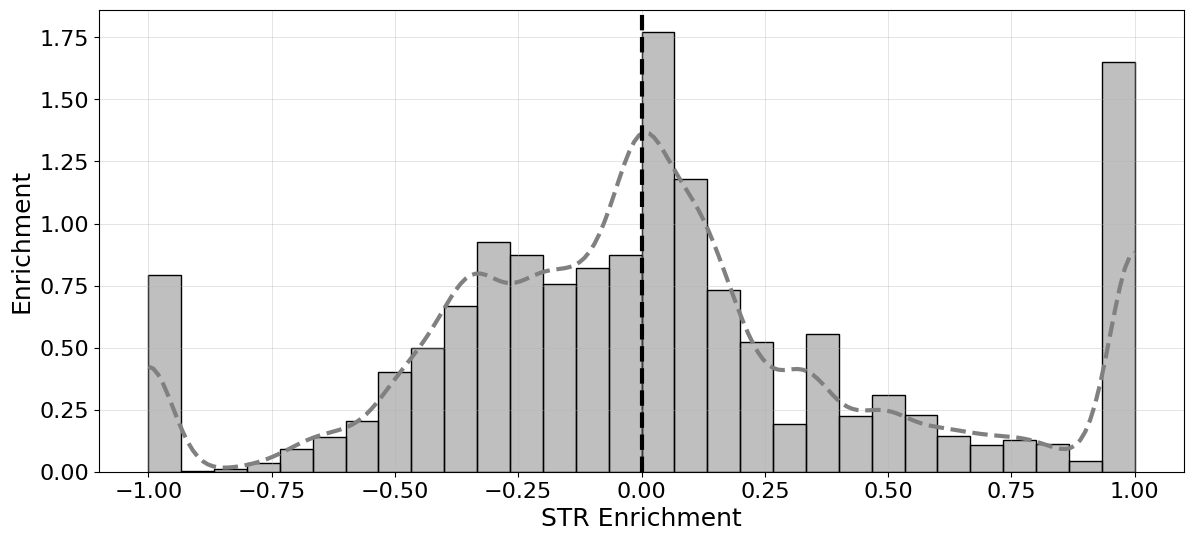

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.histplot(data=sorted_densities, 
                     x="enrichmentCounts", 
                     kde=True, 
                     bins=30, 
                     stat="density",
                        line_kws={"linestyle": "--", "alpha": 1.0, "lw": 3.0},
                     color="gray", 
                     ax=ax)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.axvline(0.0, linestyle='--', color='black', lw=3.0)
ax.set_xlabel("STR Enrichment")
ax.xaxis.label.set_size(18)
ax.set_ylabel("Enrichment")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", which="major", labelsize=16)
ax.legend(title="", frameon=False)
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/histplot_simulation_enrichment.png", bbox_inches='tight')
plt.show()


# Mann Whitney Test

In [234]:
from scipy.stats import mannwhitneyu as mwhitney

In [237]:
for domain in ["Eukaryota", "Archaea", "Viruses", "Bacteria"]:
    temp = sorted_densities.query(f"superkingdom == '{domain}'")
    simulation_vector = temp['simulationTandemDensity']
    observed_vector = temp['tandemDensity']
    print(domain, mwhitney(simulation_vector, observed_vector))

Eukaryota MannwhitneyuResult(statistic=2867.0, pvalue=6.295231910753876e-145)
Archaea MannwhitneyuResult(statistic=250685.0, pvalue=9.336136597127996e-06)
Viruses MannwhitneyuResult(statistic=894321181.0, pvalue=0.0)
Bacteria MannwhitneyuResult(statistic=1425557985.0, pvalue=0.0)


In [240]:
domain_colors

{'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

# Domain Level Distributional Differences

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


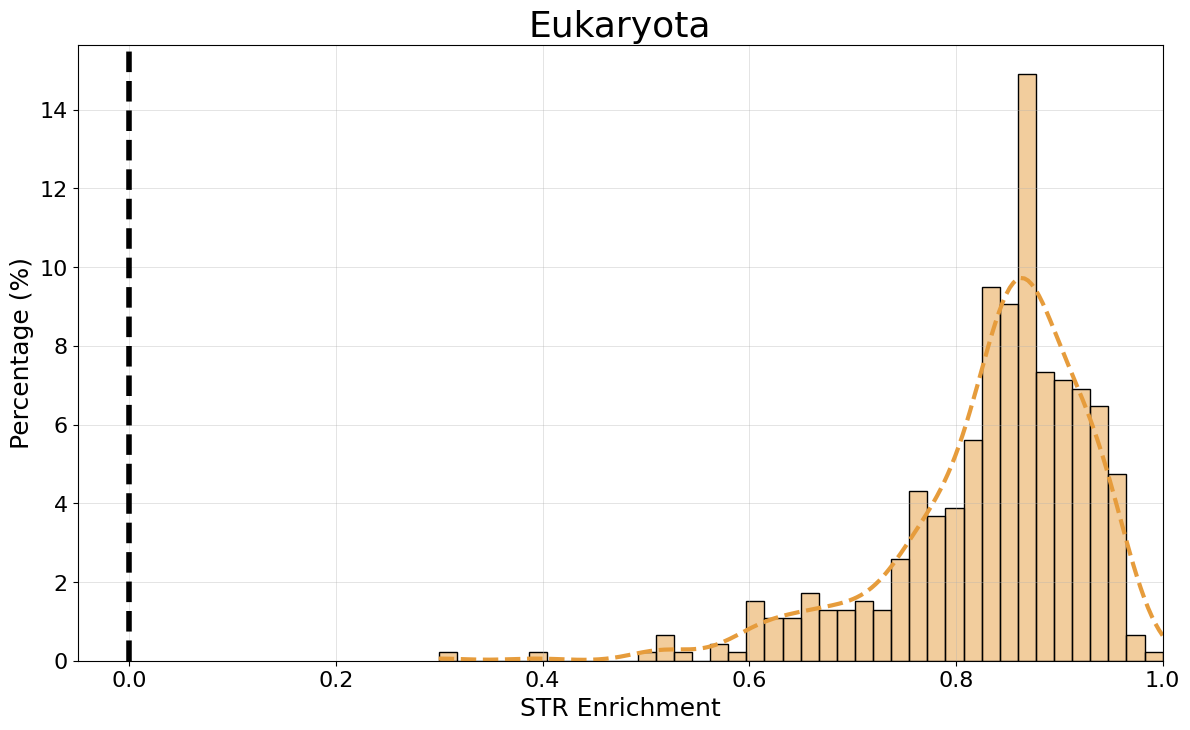

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


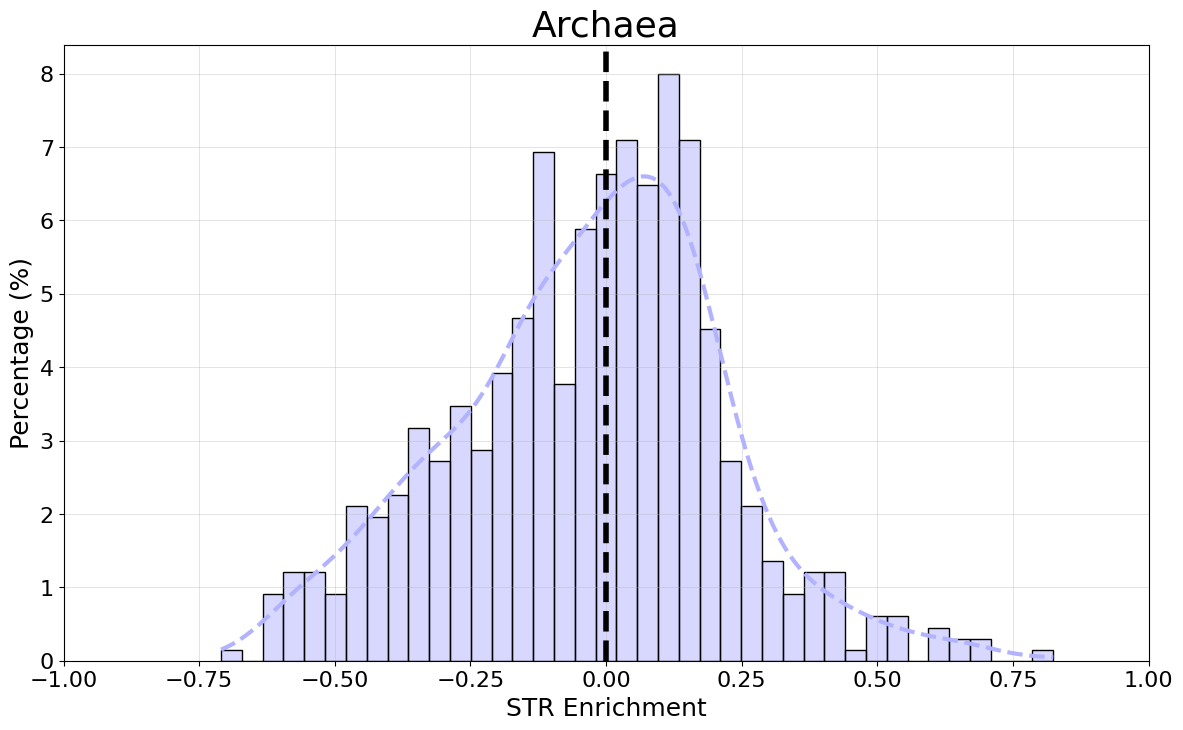

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


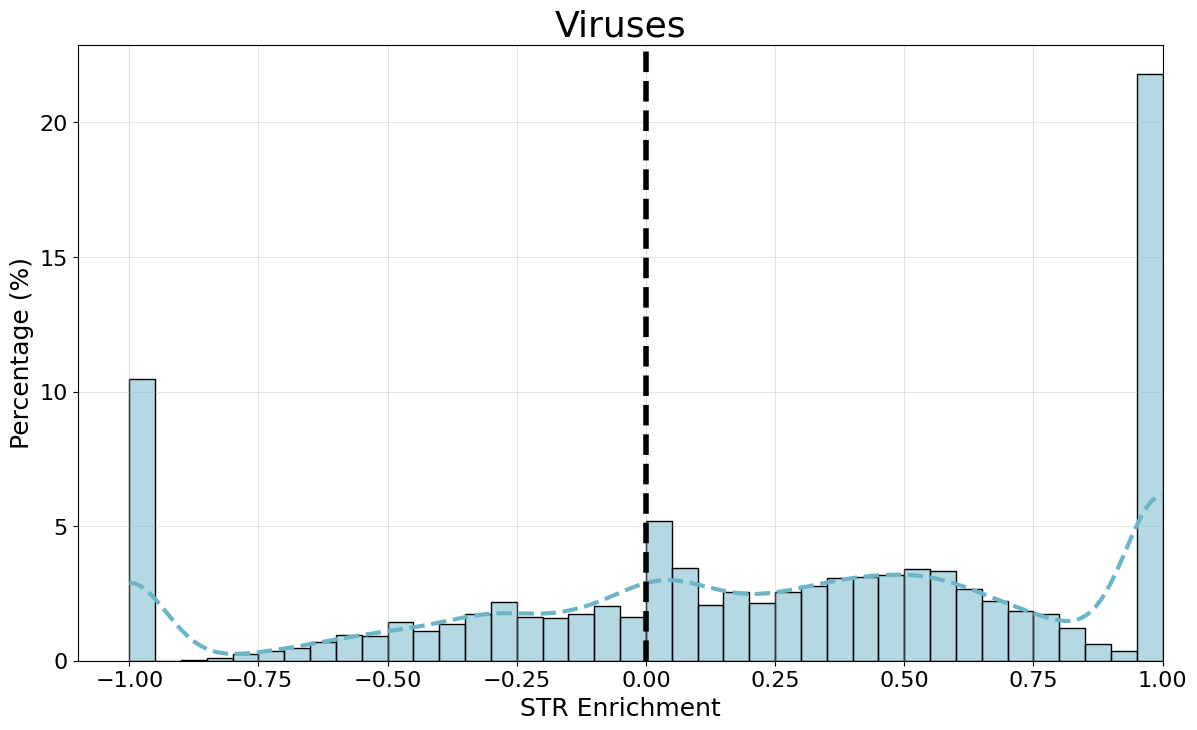

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


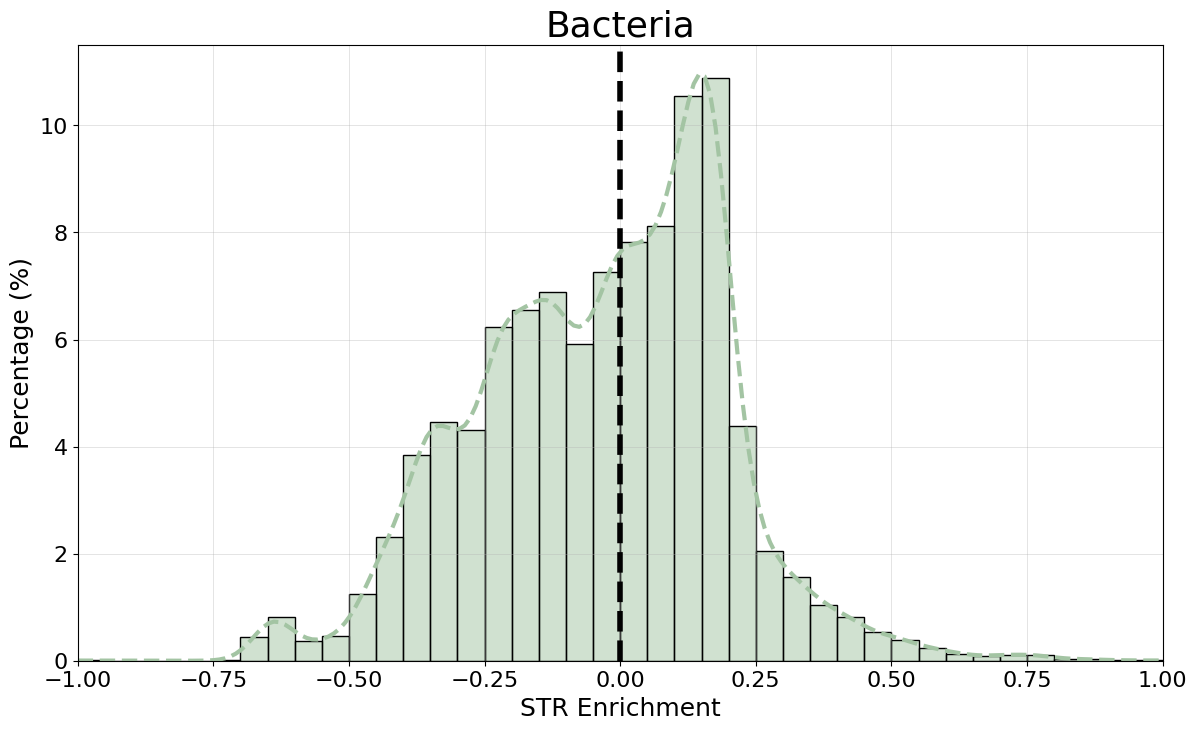

In [213]:
for domain in ["Eukaryota", "Archaea", "Viruses", "Bacteria"]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
    sns.histplot(data=sorted_densities.query(f"superkingdom == '{domain}'"), 
                         x="enrichmentbp", 
                         kde=True, 
                         stat="percent",
                         bins=40,  
                        line_kws={"linestyle": "--", "alpha": 1.0, "lw": 3.0},
                         color=domain_colors[domain], 
                 ax=ax)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("STR Enrichment")
    ax.xaxis.label.set_size(18)
    ax.axvline(0.0, linestyle='--', color='black', lw=4.0)
    ax.legend(title="", frameon=False)
    ax.set_title(domain)
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.title.set_size(26)
    ax.set_xlim(xmax=1.0)
    if domain == "Bacteria" or domain == "Archaea":
        ax.set_xlim(xmin=-1.0)
        
    ax.set_ylabel("Percentage (%)")
    ax.yaxis.label.set_size(18)
    target = dest.joinpath("enrichment_simie")
    target.mkdir(exist_ok=True)
    fig.savefig(f"{target}/histplot_simulation_enrichment_{domain}.png", bbox_inches='tight')
    plt.show()
    plt.close()

# Expected vs. Observed Domains

In [ ]:
(X-Y)/(X+Y)

In [253]:
joint_densities.groupby("kingdom", as_index=False).agg({"enrichmentCounts": "mean"}).sort_values(by=['enrichmentCounts'], ascending=False)

,kingdom,enrichmentCounts
10,Plantae,0.830447
4,Fungi,0.781697
0,Animalia,0.779901
11,Protista,0.735903
13,Shotokuvirae,0.604818
14,Trapavirae,0.447619
5,Helvetiavirae,0.414766
2,Bamfordvirae,0.392048
7,Loebvirae,0.295433
8,Orthornavirae,0.215488


In [41]:
merged_grouped = joint_densities.rename(columns={"tandemDensity": "Observed Density", 
                                                 "simulationTandemDensity": "Expected Density"}
                                       )
melted_group = merged_grouped[["#assembly_accession", "phylum", "kingdom", "superkingdom", "Observed Density", "Expected Density"]].melt(id_vars=['superkingdom', 'kingdom', "phylum", '#assembly_accession'],
                                                                                                                                           var_name="typ",
                                                                                                                                   )
melted_group

,superkingdom,kingdom,phylum,#assembly_accession,typ,value
0,Bacteria,Eubacteria,Fusobacteriota,GCA_000007325.1,Observed Density,86.916533
1,Bacteria,Eubacteria,Pseudomonadota,GCA_000007385.1,Observed Density,138.421217
2,Bacteria,Eubacteria,Bacillota,GCA_000008005.1,Observed Density,49.699484
3,Archaea,Archaeabacteria,Nanoarchaeota,GCA_000008085.1,Observed Density,65.188384
4,Bacteria,Eubacteria,Pseudomonadota,GCA_000008885.1,Observed Density,476.526449
...,...,...,...,...,...,...
197905,Viruses,Orthornavirae,Pisuviricota,GCA_031155625.1,Expected Density,131.285283
197906,Viruses,Orthornavirae,Kitrinoviricota,GCF_004134665.1,Expected Density,108.530497
197907,Viruses,Unclassified Viruses,NaN,GCF_001935185.1,Expected Density,197.083169
197908,Viruses,Shotokuvirae,Cressdnaviricota,GCA_004063555.1,Expected Density,565.930956


In [44]:
from scipy.stats import mannwhitneyu as mwhitney

In [45]:
for domain in ["Eukaryota", "Archaea", "Viruses", "Bacteria"]:
    temp = sorted_densities.query(f"superkingdom == '{domain}'")
    simulation_vector = temp['simulationTandemDensity']
    observed_vector = temp['tandemDensity']
    print(domain, mwhitney(simulation_vector, observed_vector))
    print(observed_vector.mean()/simulation_vector.mean())

Eukaryota MannwhitneyuResult(statistic=2867.0, pvalue=6.295231910753876e-145)
9.797858545685834
Archaea MannwhitneyuResult(statistic=250685.0, pvalue=9.336136597127996e-06)
0.8926974575543795
Viruses MannwhitneyuResult(statistic=894321181.0, pvalue=0.0)
1.8283241347359527
Bacteria MannwhitneyuResult(statistic=1425557985.0, pvalue=0.0)
0.8344413545962819


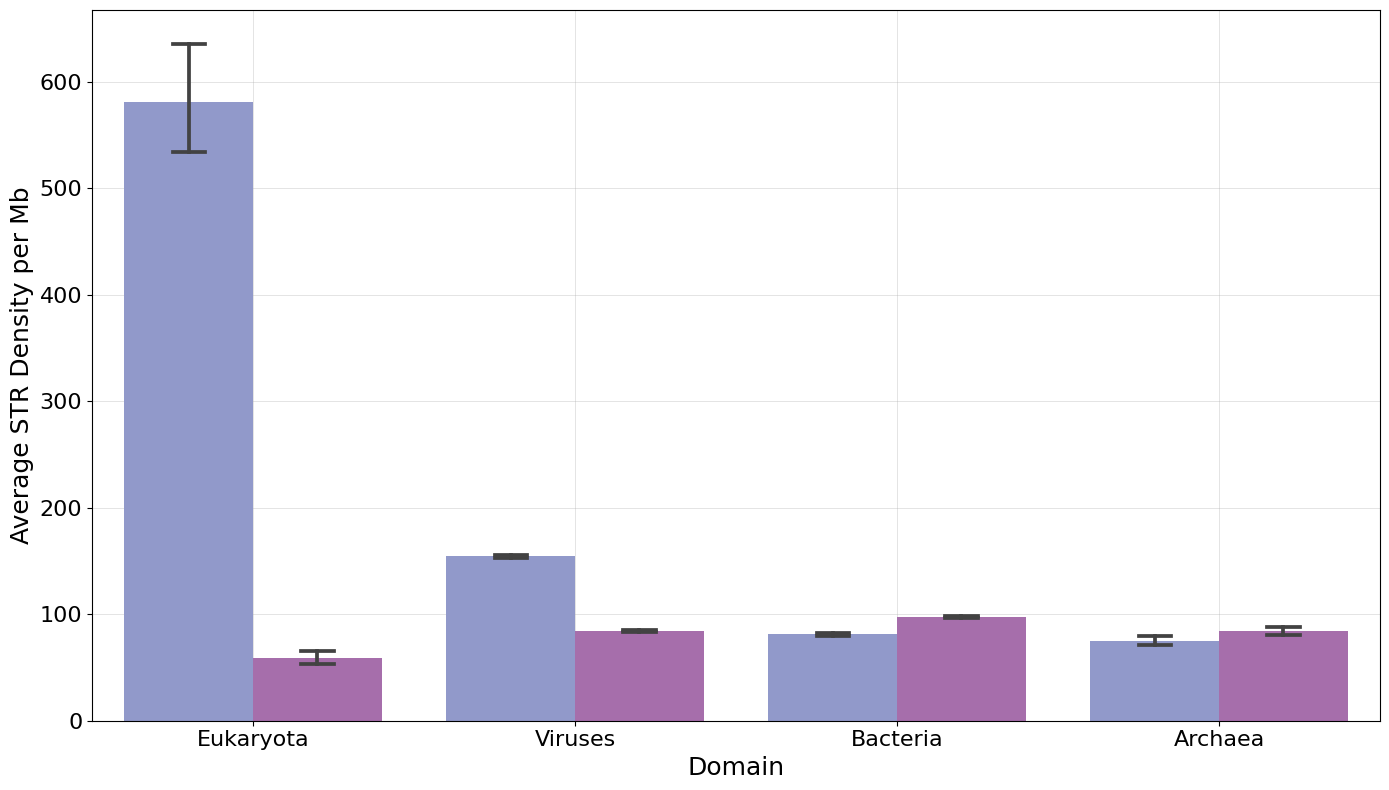

In [47]:
fig = plt.figure(figsize=(14, 8)) 
ax = sns.barplot(x='superkingdom', 
                 y="value", 
                 # width=0.6, 
                 data=melted_group, 
                 hue="typ", 
                 order=["Eukaryota", "Viruses", "Bacteria", "Archaea"],
                 # hue_order=["Eukaryota", "Viruses", "Bacteria", "Archaea"],
                 errorbar=('ci', 95),
                 capsize = 0.1,
                 palette={"Observed Density": "#8792d4", 
                          "Expected Density": "#ae64b5"},
                 alpha=1.0)

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Domain")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_ylabel("Average STR Density per Mb")
ax.xaxis.label.set_size(18)
ax.legend(handles=[], frameon=False)
# legend = ax.legend(prop={"size": 15}, 
#                    fancybox=True, 
#                    shadow=False, 
#                    bbox_to_anchor=(1.3, 0.8),
#                    title='')
# plt.setp(legend.get_title(), fontsize=14)


ax.yaxis.label.set_size(18)
ax.tick_params(axis="both",  which="major", labelsize=16)
plt.tight_layout()
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath("expected_vs_observed_tandem_density.png"), bbox_inches='tight')

plt.show()

In [48]:
melted_group.loc[:, "kingdomR"] = melted_group["kingdom"].apply(lambda x: "Viruses" if x not in {"Fungi", "Eubacteria", "Archaeabacteria", "Protista", "Plantae", "Animalia"} else x)

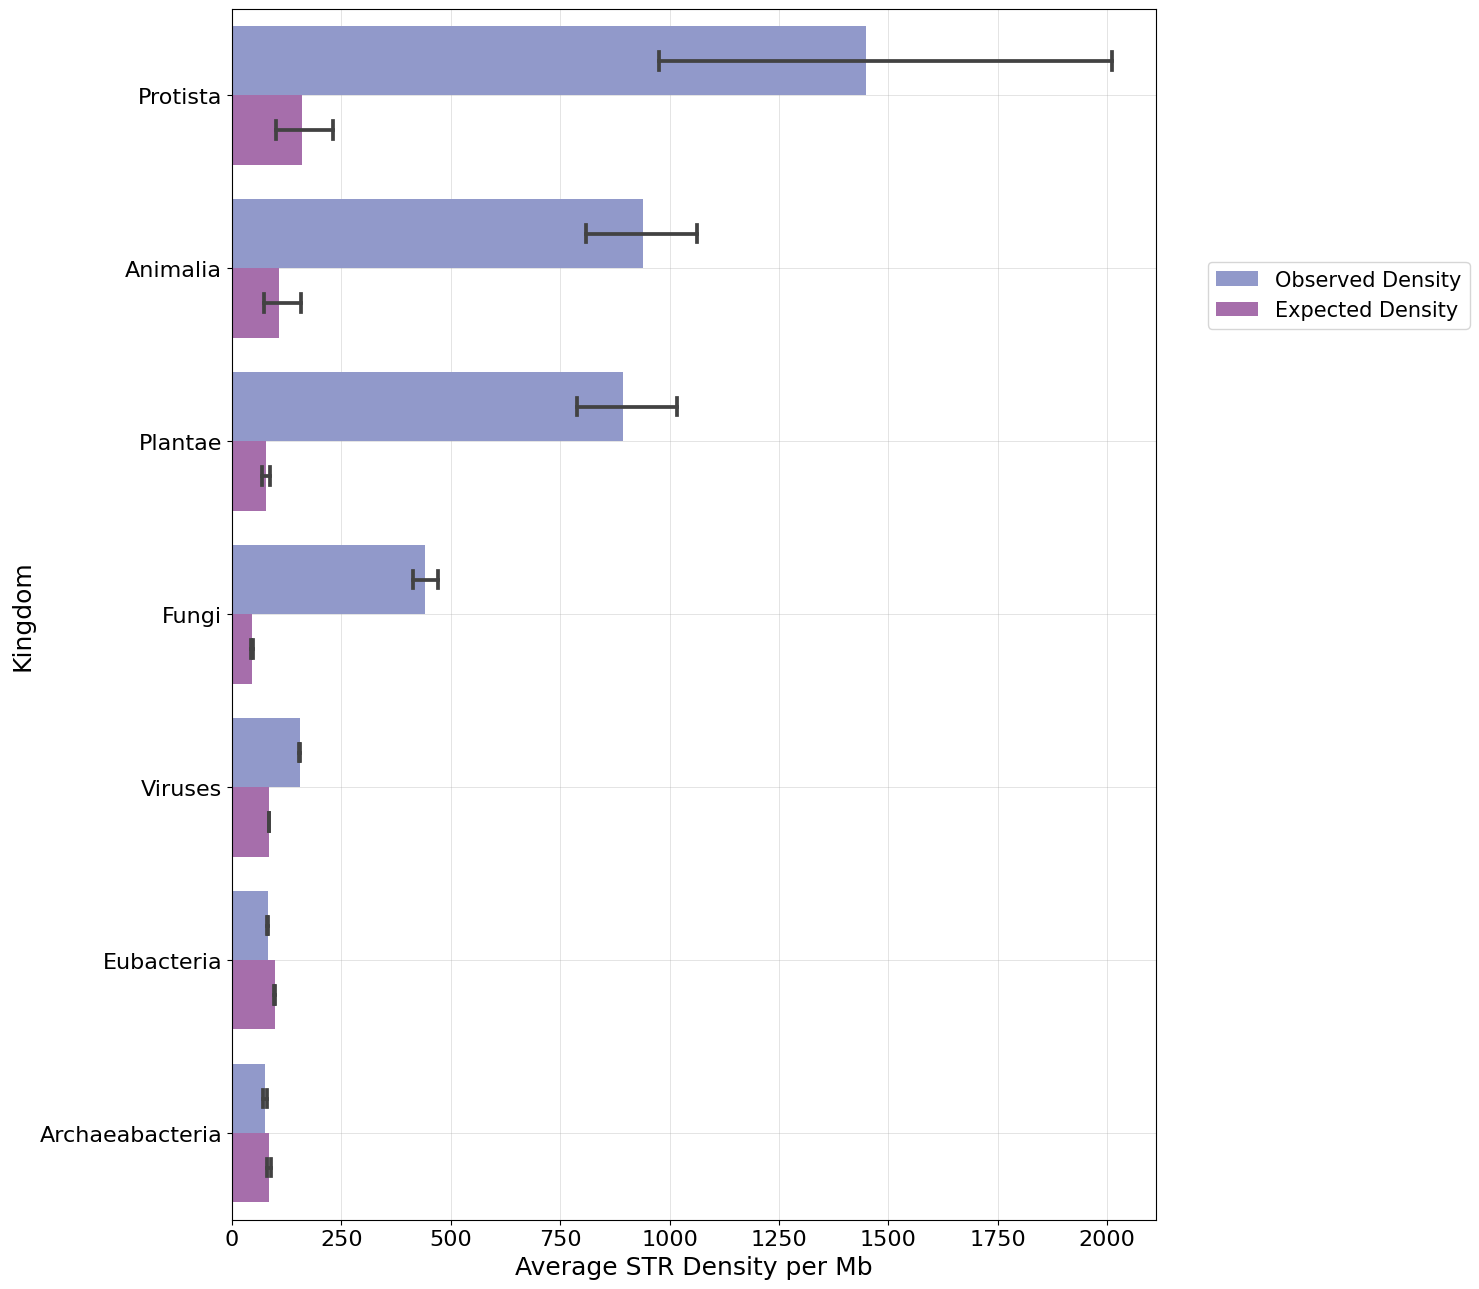

In [49]:
fig = plt.figure(figsize=(16, 13)) 
ax = sns.barplot(y='kingdomR', 
                 x="value", 
                 orient="h",
                 data=melted_group,
                 hue="typ", 
                 order=["Protista", "Animalia", "Plantae", "Fungi", "Viruses", "Eubacteria", "Archaeabacteria"],
                 errorbar=('ci', 95),
                 capsize = 0.1,
                 palette={"Observed Density": "#8792d4", 
                          "Expected Density": "#ae64b5"},
                 alpha=1.0)

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("Kingdom")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_xlabel("Average STR Density per Mb")
ax.xaxis.label.set_size(18)
legend = ax.legend(prop={"size": 15}, 
                   fancybox=True, 
                   shadow=False, 
                   bbox_to_anchor=(1.35, 0.8),
                   title='')
plt.setp(legend.get_title(), fontsize=16)


ax.yaxis.label.set_size(18)
ax.tick_params(axis="both",  which="major", labelsize=16)
plt.tight_layout()
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath("expected_vs_observed_tandem_density_kingdoms.png"), bbox_inches='tight')
plt.show()

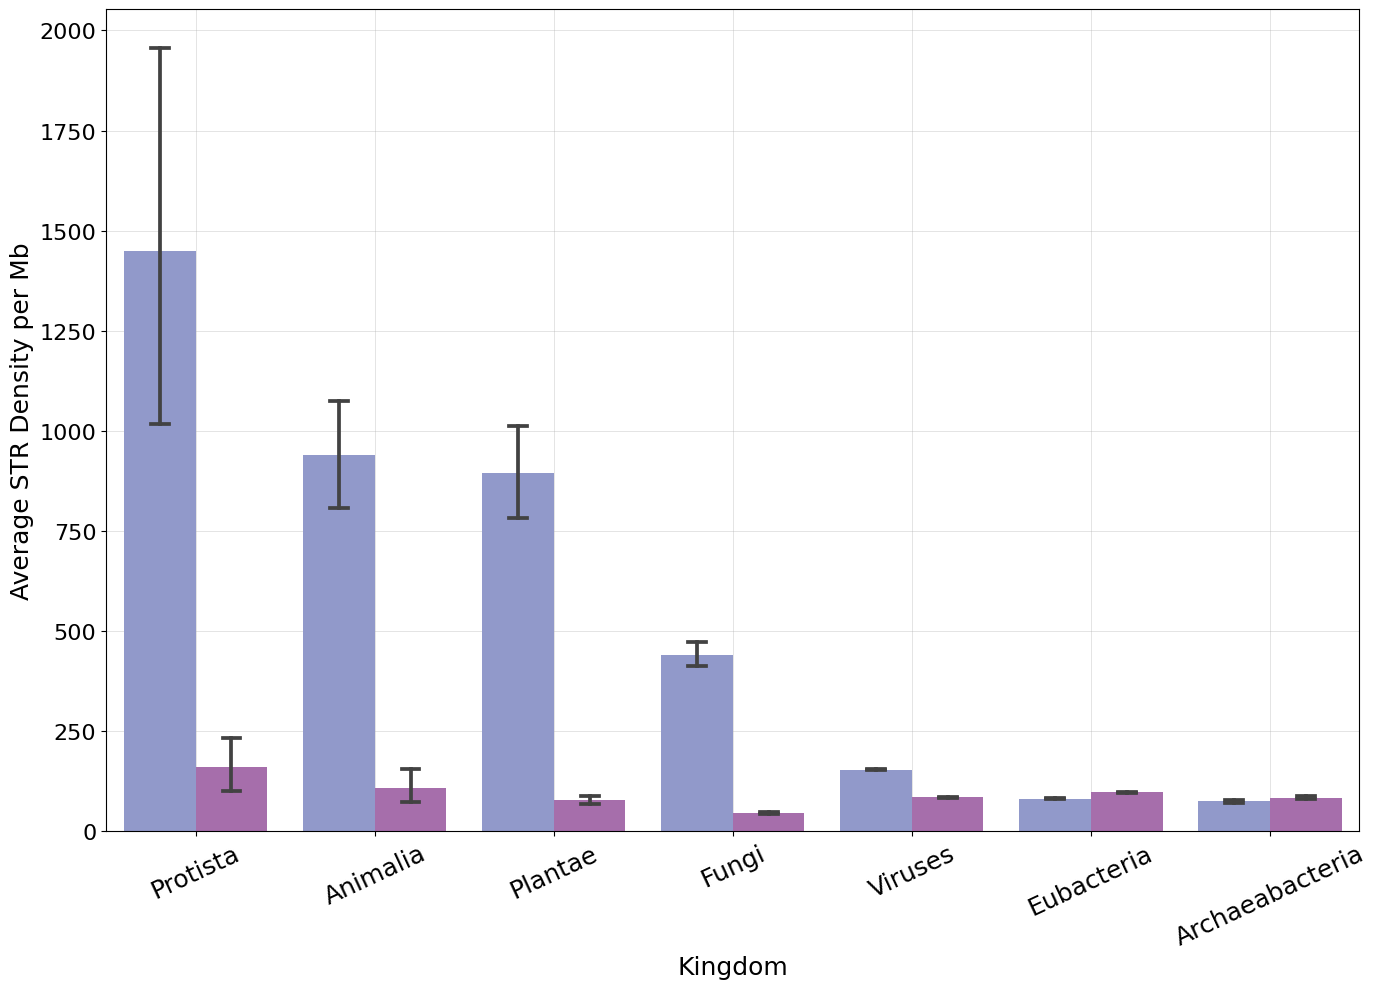

In [50]:
fig = plt.figure(figsize=(14, 10)) 
ax = sns.barplot(x='kingdomR', 
                 y="value",
                 data=melted_group,
                 hue="typ", 
                 order=["Protista", "Animalia", "Plantae", "Fungi", "Viruses", "Eubacteria", "Archaeabacteria"],
                 errorbar=('ci', 95),
                 capsize = 0.1,
                 palette={"Observed Density": "#8792d4", 
                          "Expected Density": "#ae64b5"},
                 alpha=1.0)

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Kingdom")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.tick_params(axis="x", which="major", rotation=25, labelsize=18)
ax.set_ylabel("Average STR Density per Mb")
ax.xaxis.label.set_size(18)
ax.legend(handles=[], frameon=False)
plt.setp(legend.get_title(), fontsize=16)

ax.yaxis.label.set_size(18)
plt.tight_layout()
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath("expected_vs_observed_tandem_density_horizontal_kingdoms.png"), bbox_inches='tight')
plt.show()

# Viral Hosts Enrichment

In [91]:
host_eukaryota = { 'plants', 
                   'eukaryotic algae',
                   'invertebrates',
                   'fungi',
                   'land plants',
                   'human',
                   'protozoa',
                   'vertebrates'
                 }

viruses = pd.read_csv("viruses.txt", delimiter="\t").query("Host != '-'")
viruses.loc[:, "hostRe"] = viruses["Host"].apply(lambda y: 'Eukaryota' if all(i.strip() in host_eukaryota for i in y.split(',')) else y.capitalize())
viruses = viruses[viruses['hostRe'].isin({'Bacteria', 'Archaea', 'Eukaryota'})][["#Organism/Name", "hostRe"]].drop_duplicates()
viruses

,#Organism/Name,hostRe
0,Plasmavirus L2,Bacteria
1,Pseudoalteromonas phage PM2,Bacteria
2,Circular ssDNA virus sp.,Eukaryota
3,Mushroom bacilliform virus,Eukaryota
4,Shrimp white spot syndrome virus,Eukaryota
...,...,...
71771,Porcine circovirus 2 strain SD6,Eukaryota
71776,Porcine circovirus 2 strain SD5,Eukaryota
71779,Porcine circovirus 2 strain SD3,Eukaryota
71916,Bovine rotavirus,Eukaryota


In [92]:
df_simie_viral = df_simie.query("superkingdom == 'Viruses'")
df_viral = df_tandem.query("superkingdom == 'Viruses'") 

In [93]:
empty_viral_df = empty_tandem_df.query("superkingdom == 'Viruses'")
empty_simie_viral_df = empty_simie_df.query("superkingdom == 'Viruses'")

In [115]:
df_viral_mgd_grouped = df_viral.groupby(["#assembly_accession"], as_index=False)\
                                    .agg({"consensus": "count", 
                                          "genome_size": "first",
                                          "organism_name": "first",
                                         })\
                                    .rename(columns={"consensus": "tandemCounts"})\
                                    .assign(tandemDensity=lambda ds: ds['tandemCounts'].div(ds['genome_size']) * 1e6)           


df_simie_viral_mgd_grouped = df_simie_viral.groupby(["#assembly_accession"], as_index=False)\
                                    .agg({"consensus": "count", 
                                          "genome_size": "first",
                                          "organism_name": "first",
                                         })\
                                    .rename(columns={"consensus": "tandemCounts"})\
                                    .assign(tandemDensity=lambda ds: ds['tandemCounts'].div(ds['genome_size']) * 1e6)

columns_for_empty = ["#assembly_accession", "genome_size", "superkingdom", "phylum", "organism_name", "kingdom"]
df_viral_mgd_grouped = pd.concat([df_viral_mgd_grouped, 
                                  empty_viral_df[columns_for_empty]], axis=0)

df_viral_mgd_grouped["tandemDensity"] = df_viral_mgd_grouped["tandemDensity"].fillna(0.0)
df_viral_mgd_grouped["tandemCounts"] = df_viral_mgd_grouped["tandemCounts"].fillna(0.0).astype(int)

df_simie_viral_mgd_grouped  = pd.concat([df_simie_viral_mgd_grouped, 
                                         empty_simie_viral_df[columns_for_empty]], axis=0)

df_simie_viral_mgd_grouped["tandemDensity"] = df_simie_viral_mgd_grouped["tandemDensity"].fillna(0.0)
df_simie_viral_mgd_grouped["tandemCounts"] = df_simie_viral_mgd_grouped["tandemCounts"].fillna(0.0).astype(int)
df_simie_viral_mgd_grouped = df_simie_viral_mgd_grouped.rename(columns={"length": "simulationLength",
                                                                                  "tandemDensity": "simulationTandemDensity", 
                                                                                  "tandemCounts": "simulationTandemCounts", 
                                                                                 })


df_simie_viral_mgd_grouped = df_simie_viral_mgd_grouped.merge(viruses, left_on="organism_name", right_on="#Organism/Name", how="inner")
df_viral_mgd_grouped = df_viral_mgd_grouped.merge(viruses, left_on="organism_name", right_on="#Organism/Name", how="inner")

df_simie_viral_mgd_grouped 

,#assembly_accession,simulationTandemCounts,genome_size,organism_name,simulationTandemDensity,superkingdom,phylum,kingdom,#Organism/Name,hostRe
0,GCA_000529295.1,10,142709,Spodoptera exigua multiple nucleopolyhedrovirus,70.072665,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota
1,GCA_000529585.1,7,135718,Spodoptera exigua multiple nucleopolyhedrovirus,51.577536,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota
2,GCA_000530085.1,10,135653,Spodoptera exigua multiple nucleopolyhedrovirus,73.717500,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota
3,GCA_000530135.1,3,134972,Spodoptera exigua multiple nucleopolyhedrovirus,22.226832,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota
4,GCA_000530235.2,5,135556,Spodoptera exigua multiple nucleopolyhedrovirus,36.885125,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota
...,...,...,...,...,...,...,...,...,...,...
39963,GCF_002958515.1,0,39482,Escherichia phage HZ2R8,0.000000,Viruses,Uroviricota,Heunggongvirae,Escherichia phage HZ2R8,Bacteria
39964,GCA_031161245.1,0,10648,Bainyik virus,0.000000,Viruses,Kitrinoviricota,Orthornavirae,Bainyik virus,Eukaryota
39965,GCF_001926115.1,0,6589,Wenling chuvirus-like virus 1,0.000000,Viruses,NaN,Unclassified Viruses,Wenling chuvirus-like virus 1,Eukaryota
39966,GCA_013426335.1,0,46150,Escherichia phage vB_EcoD_SU57,0.000000,Viruses,Uroviricota,Heunggongvirae,Escherichia phage vB_EcoD_SU57,Bacteria


In [122]:
joint_densities_viral = df_viral_mgd_grouped.merge(df_simie_viral_mgd_grouped[["#assembly_accession", 
                                                                          "simulationTandemCounts"
                                                                         ]], 
                                                   on="#assembly_accession", 
                                                   how="outer")

joint_densities_viral = joint_densities_viral.query("tandemCounts > 0 | simulationTandemCounts > 0")
joint_densities_viral.loc[:, "enrichmentCounts"] = (joint_densities_viral["tandemCounts"] - joint_densities_viral["simulationTandemCounts"]).div(joint_densities_viral["simulationTandemCounts"] + joint_densities_viral["tandemCounts"])
# joint_densities.loc[:, "logEnrichmentCounts"] = joint_densities["enrichmentCounts"].apply(lambda y: math.log(y, 10))
joint_densities_viral

,#assembly_accession,tandemCounts,genome_size,organism_name,tandemDensity,superkingdom,phylum,kingdom,#Organism/Name,hostRe,simulationTandemCounts,enrichmentCounts
0,GCA_000529295.1,106,142709,Spodoptera exigua multiple nucleopolyhedrovirus,742.770253,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota,10,0.827586
1,GCA_000529585.1,107,135718,Spodoptera exigua multiple nucleopolyhedrovirus,788.399475,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota,7,0.877193
2,GCA_000530085.1,103,135653,Spodoptera exigua multiple nucleopolyhedrovirus,759.290248,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota,10,0.823009
3,GCA_000530135.1,103,134972,Spodoptera exigua multiple nucleopolyhedrovirus,763.121240,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota,3,0.943396
4,GCA_000530235.2,101,135556,Spodoptera exigua multiple nucleopolyhedrovirus,745.079524,NaN,NaN,NaN,Spodoptera exigua multiple nucleopolyhedrovirus,Eukaryota,5,0.905660
...,...,...,...,...,...,...,...,...,...,...,...,...
39958,GCA_004775945.1,0,10038,Streptococcus satellite phage Javan555,0.000000,Viruses,NaN,Unclassified Viruses,Streptococcus satellite phage Javan555,Bacteria,1,-1.000000
39959,GCA_031155625.1,0,7617,Norovirus Hu/GI.1/8K/1979/USA,0.000000,Viruses,Pisuviricota,Orthornavirae,Norovirus Hu/GI.1/8K/1979/USA,Eukaryota,1,-1.000000
39962,GCF_004134665.1,0,9214,Salvia divinorum RNA virus 1,0.000000,Viruses,Kitrinoviricota,Orthornavirae,Salvia divinorum RNA virus 1,Eukaryota,1,-1.000000
39966,GCF_001935185.1,0,5074,Beihai sobemo-like virus 11,0.000000,Viruses,NaN,Unclassified Viruses,Beihai sobemo-like virus 11,Eukaryota,1,-1.000000


In [123]:
joint_densities_viral['enrichmentCounts'].max()

1.0

Tandem Density = Tandem Raw Counts [Occurrences] 1e6 / Genome Size

In [200]:
joint_densities_viral.groupby("hostRe").agg({"tandemDensity": "mean"})

,tandemDensity
hostRe,
Archaea,127.857004
Bacteria,74.364118
Eukaryota,219.227161


In [142]:
import itertools

for host in itertools.combinations(["Eukaryota", "Bacteria", "Archaea"], 2):
    print(host)
    hostA, hostB = host
    temp_host = joint_densities_viral.query(f"hostRe == '{hostA}'")
    temp_host2 = joint_densities_viral.query(f"hostRe == '{hostB}'")
    print(mwhitney(temp_host['enrichmentCounts'], temp_host2['enrichmentCounts']))

('Eukaryota', 'Bacteria')
MannwhitneyuResult(statistic=153182084.5, pvalue=0.0)
('Eukaryota', 'Archaea')
MannwhitneyuResult(statistic=5093369.5, pvalue=1.2684646248423868e-16)
('Bacteria', 'Archaea')
MannwhitneyuResult(statistic=1609590.5, pvalue=3.4780820093312807e-12)


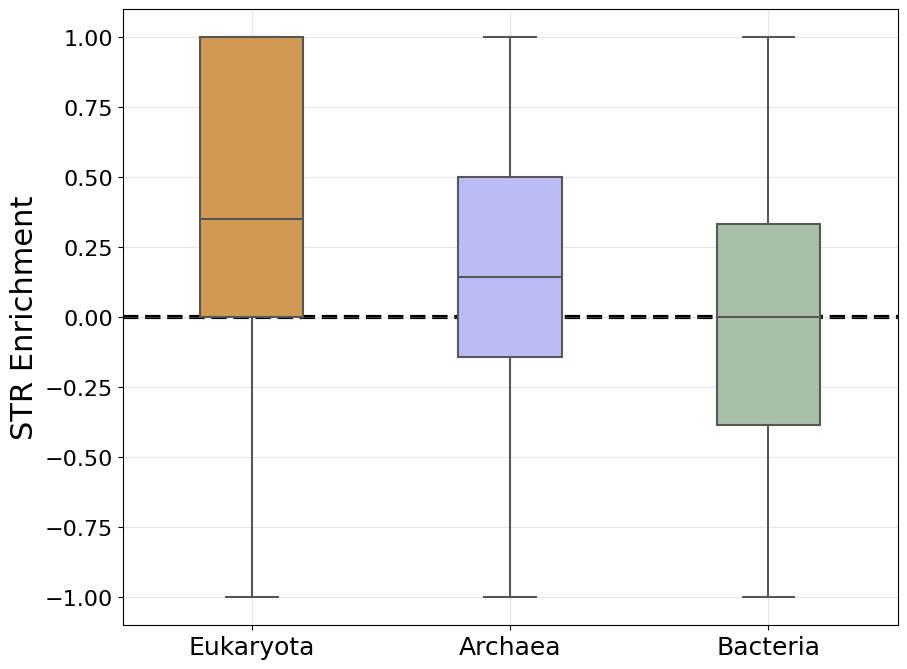

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.boxplot(data=joint_densities_viral, 
            y="enrichmentCounts", 
            width=0.4, 
            x="hostRe", 
            ax=ax, 
            zorder=4, 
            order=["Eukaryota", "Archaea", "Bacteria",],
            showfliers=True,
           palette=domain_colors,
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("")
ax.set_axisbelow(True)
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=18)
ax.set_ylabel("STR Enrichment")
ax.axhline(0.0, linestyle='--', color='black', lw=3.0, zorder=0)
ax.yaxis.label.set_size(22)

target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath("viral_hosts_expected_vs_observed_density_boxplot.png"), bbox_inches='tight')


# Same analysis with Repeating Unit Split

In [166]:
df_tandem.loc[:, "AT_content"] = df_tandem["consensus"].str.count("a|t") * df_tandem["consensus_repeats"]
df_simie.loc[:, "AT_content"] = df_simie["consensus"].str.count("a|t") * df_simie["consensus_repeats"]

In [187]:
tandem_grouped_sru = df_tandem.groupby(["#assembly_accession", "sru"], as_index=False)\
                                .agg({"length": "sum", 
                                      "genome_size": "first", 
                                      "superkingdom": "first", 
                                      "phylum": "first", 
                                      "organism_name": "first", 
                                      "kingdom": "first",
                                      "consensus": "count",
                                      "AT_content": "sum",
                                     })\
                                .rename(columns={"consensus": "tandemCounts"})\
                                .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']))\
                                .assign(bpDensity=lambda ds: 1e6 * ds['length'].div(ds['genome_size']))\
                                .assign(at_perc=lambda ds: 1e2 * ds['AT_content'].div(ds['length'])) 

simie_grouped_sru = df_simie.groupby(["#assembly_accession", "sru"], as_index=False)\
                    .agg({
                          "length": "sum", 
                          "genome_size": "first", 
                          "superkingdom": "first", 
                          "phylum": "first", 
                          "organism_name": "first", 
                          "kingdom": "first",
                          "consensus": "count",
                          "AT_content": "sum",
                         })\
                    .rename(columns={"consensus": "tandemCounts"})\
                    .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']))\
                    .assign(bpDensity=lambda ds: 1e6  * ds['length'].div(ds['genome_size']))\
                    .assign(at_perc=lambda ds: 1e2 * ds['AT_content'].div(ds['length']))

## AT Simulation Enrichment ? 

In [168]:
joint_densities_sru = tandem_grouped_sru.merge(simie_grouped_sru[["#assembly_accession", "sru", "superkingdom", "kingdom", "at_perc"]]\
                                                           .rename(columns={"at_perc": "simulationATPerc"}), 
                                               on=["#assembly_accession", "sru", "superkingdom", "kingdom"], 
                                               how="outer")
joint_densities_sru.loc[:, "at_enrichment"] = 1e2 * (joint_densities_sru["at_perc"] - joint_densities_sru["simulationATPerc"]).div(joint_densities_sru["at_perc"] + joint_densities_sru["simulationATPerc"])
joint_densities_sru

,#assembly_accession,sru,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,AT_content,tandemDensity,bpDensity,at_perc,simulationATPerc,at_enrichment
0,GCA_000007325.1,1,142.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,13.0,119.0,5.978386,65.302368,83.802817,100.000000,-8.812261
1,GCA_000007325.1,2,464.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,45.0,444.0,20.694413,213.382387,95.689655,93.895349,0.946439
2,GCA_000007325.1,3,750.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,61.0,535.0,28.052426,344.906875,71.333333,91.111111,-12.175103
3,GCA_000007325.1,4,600.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,50.0,534.0,22.993792,275.925500,89.000000,89.912281,-0.509904
4,GCA_000007325.1,5,195.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,13.0,171.0,5.978386,89.675788,87.692308,91.428571,-2.085890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536923,GCF_963678185.1,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,95.248380,NaN
536924,GCF_963678535.1,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,83.606557,NaN
536925,GCF_963678875.1,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,24.590164,NaN
536926,GCF_963681195.1,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,100.000000,NaN


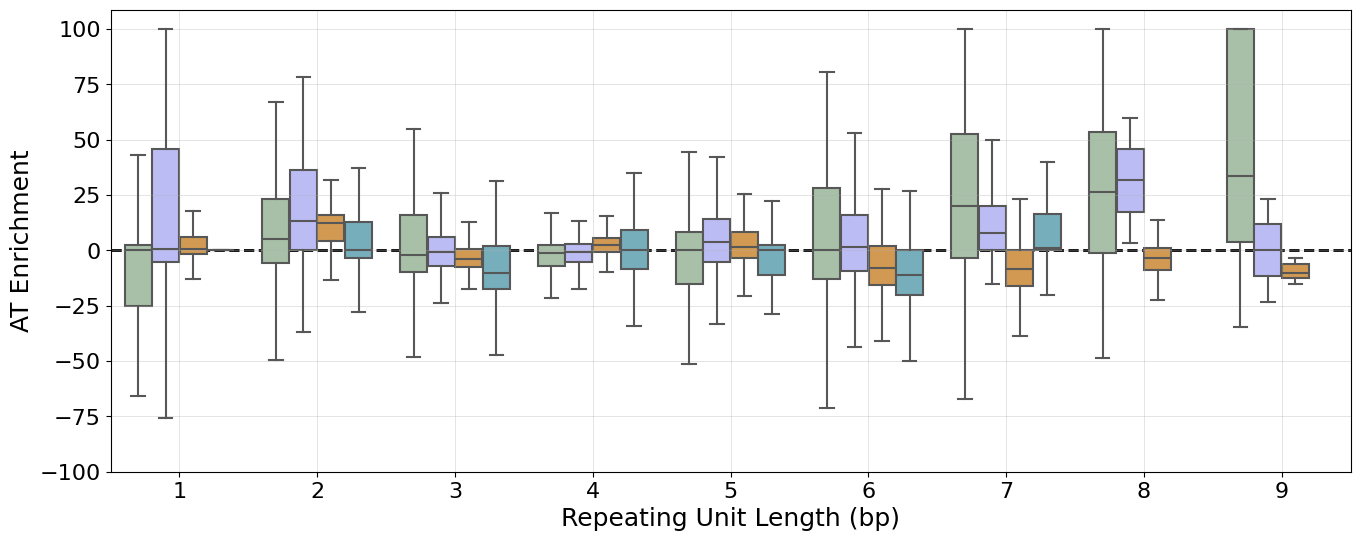

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.boxplot(data=joint_densities_sru.dropna(subset=['at_enrichment']), 
            x="sru", 
            y="at_enrichment", 
            hue="superkingdom", 
            ax=ax, 
            zorder=3, palette=domain_colors, showfliers=False)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("Repeating Unit Length (bp)")
ax.set_ylabel("AT Enrichment")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_ylim( ymin=-100.0)
ax.tick_params(axis="both", which="major", labelsize=16)
ax.legend(handles=[], frameon=False)
ax.axhline(0.0, linestyle='--', color='black', lw=2.0, zorder=0)

# for i in range(9):
#    ax.axvline(i+0.5, linestyle='-', color='black', lw=1.5)
    
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath("boxplot_sru_decomposition_at_enrichment_domain.png"), bbox_inches='tight')

In [207]:
at_joint_densities = joint_densities_sru.melt(id_vars=["#assembly_accession", "sru", "superkingdom"], value_vars=["at_perc", "simulationATPerc"], var_name="typ")
at_joint_densities

,#assembly_accession,sru,superkingdom,typ,value
0,GCA_000007325.1,1,Bacteria,at_perc,83.802817
1,GCA_000007325.1,2,Bacteria,at_perc,95.689655
2,GCA_000007325.1,3,Bacteria,at_perc,71.333333
3,GCA_000007325.1,4,Bacteria,at_perc,89.000000
4,GCA_000007325.1,5,Bacteria,at_perc,87.692308
...,...,...,...,...,...
1073851,GCF_963678185.1,1,Bacteria,simulationATPerc,95.248380
1073852,GCF_963678535.1,1,Bacteria,simulationATPerc,83.606557
1073853,GCF_963678875.1,1,Bacteria,simulationATPerc,24.590164
1073854,GCF_963681195.1,1,Bacteria,simulationATPerc,100.000000


In [238]:
target

PosixPath('/storage/group/izg5139/default/external/satellites/scripts/tandem_out/figures/enrichment_simie')

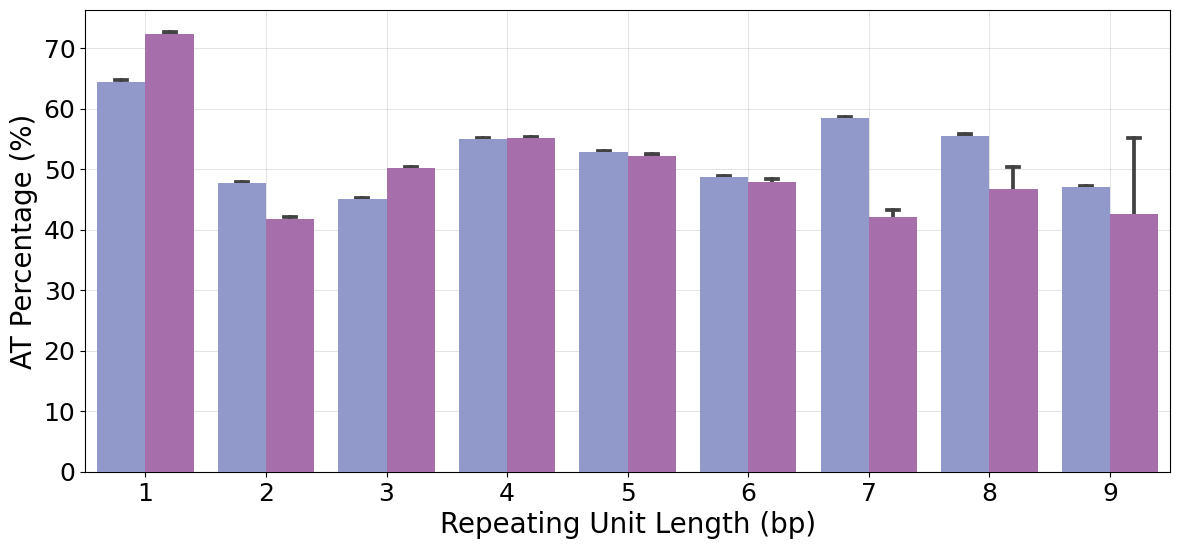

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=at_joint_densities,
            x="sru",
            y="value",
            hue="typ",
            capsize=.1,
            hue_order=["at_perc", "simulationATPerc"],
            ax=ax,
            palette={"at_perc": "#8792d4", "simulationATPerc": "#ae64b5"},
            zorder=3,
           )
ax.legend(handles=[], frameon=False)
ax.grid(lw=0.4, alpha=0.6, zorder=0)

ax.set_xlabel("Repeating Unit Length (bp)")
ax.set_ylabel("AT Percentage (%)")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.tick_params(axis="both", which="major", labelsize=18)
target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig.savefig(target.joinpath(f"expected_vs_observed_sru_decomposition_at_enrichment_all.png"), bbox_inches='tight')
plt.show()
plt.close()

Archaea


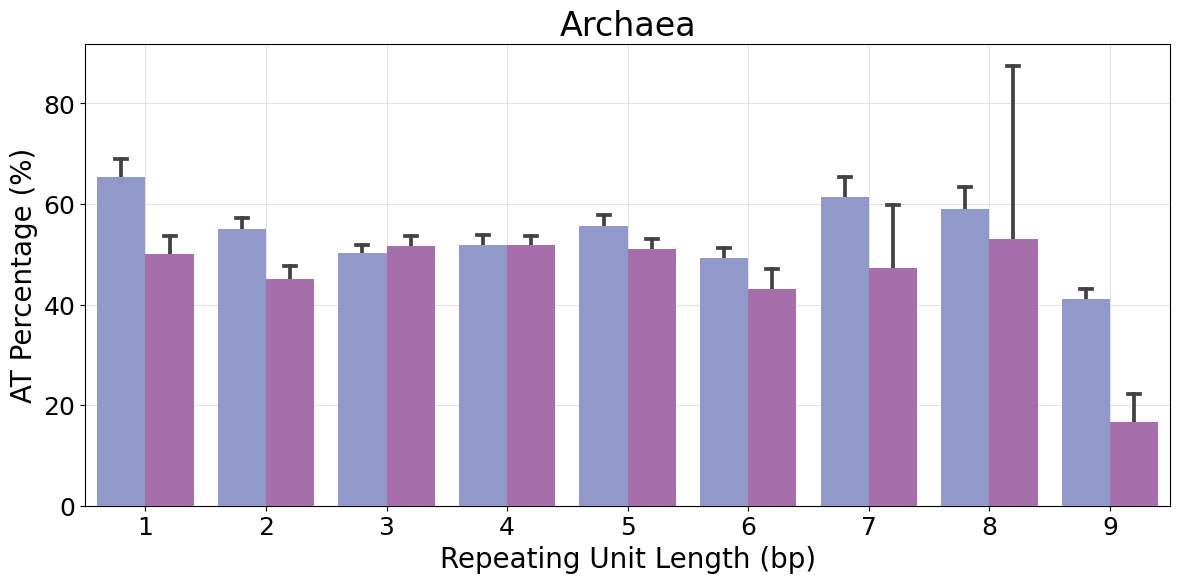

Eukaryota


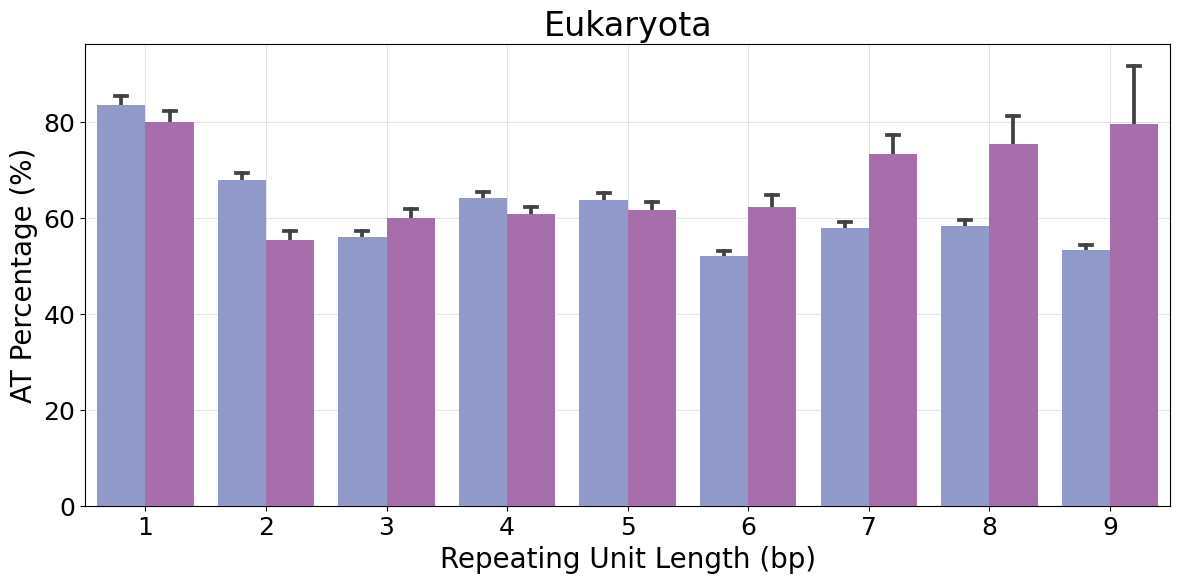

Bacteria


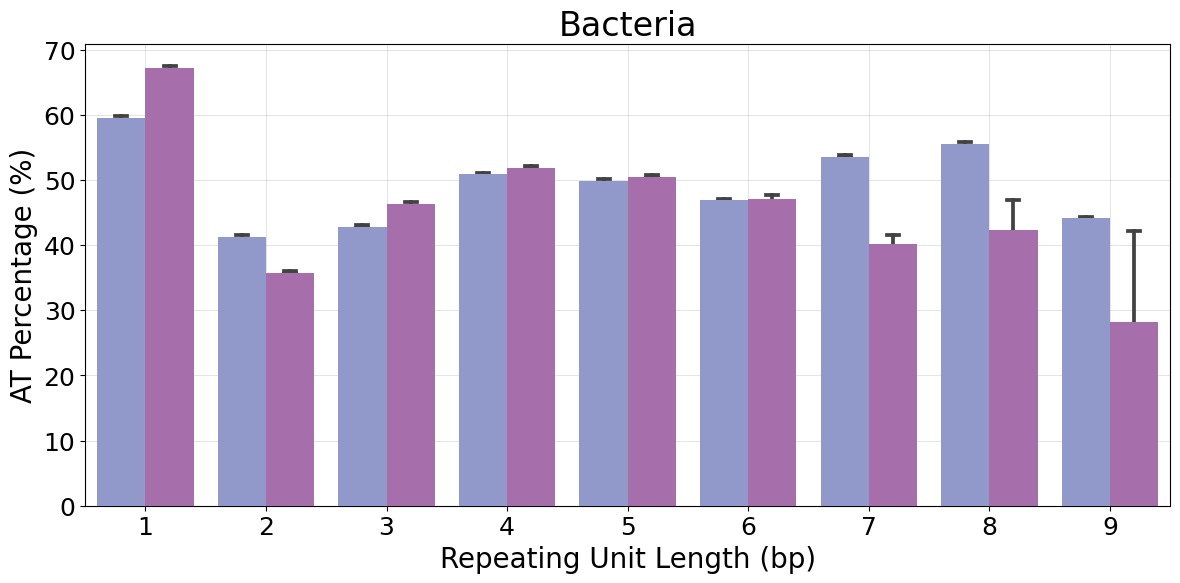

Viruses


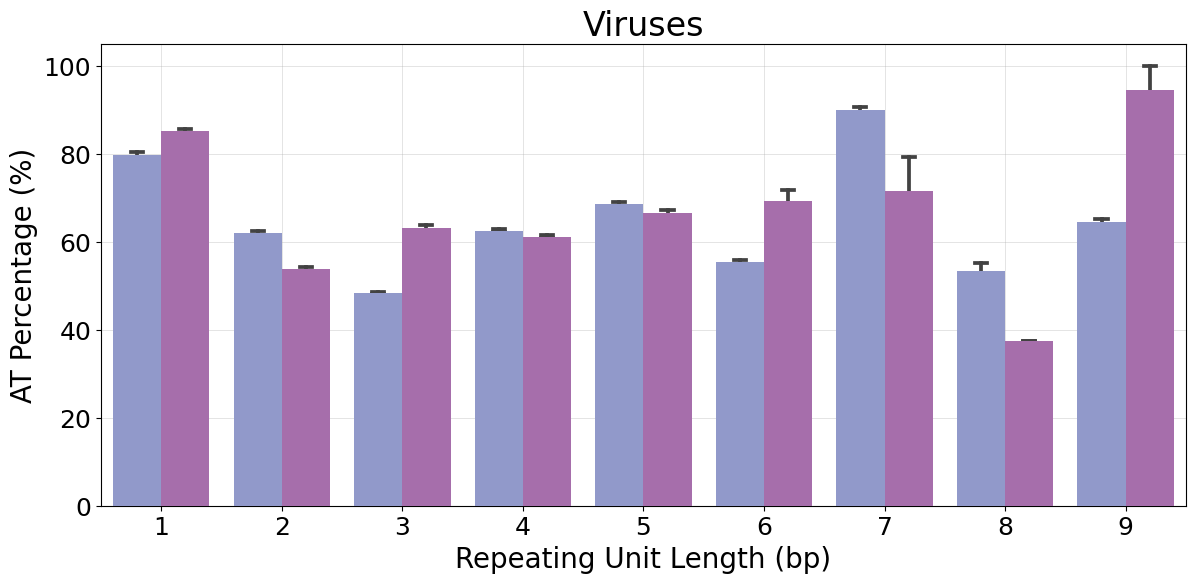

In [210]:
for domain in domains:
    print(domain)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
    sns.barplot(data=at_joint_densities.query(f"superkingdom == '{domain}'"),
                x="sru",
                y="value",
                hue="typ",
                capsize=.1,
                hue_order=["at_perc", "simulationATPerc"],
                ax=ax,
                palette={"at_perc": "#8792d4", "simulationATPerc": "#ae64b5"},
                zorder=3,
               )
    ax.legend(handles=[], frameon=False)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    
    ax.set_xlabel("Repeating Unit Length (bp)")
    ax.set_ylabel("AT Percentage (%)")
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title(domain.capitalize())
    ax.title.set_size(24)
    
    ax.tick_params(axis="both", which="major", labelsize=18)
    target = dest.joinpath("enrichment_simie")
    target.mkdir(exist_ok=True)
    fig.savefig(target.joinpath(f"expected_vs_observed_sru_decomposition_at_enrichment_{domain}.png"), bbox_inches='tight')
    plt.show()
    plt.close()

## Simulation Depletion - Enrichment


Enrichment is calculated as follows:

$Enrichment = 100 * \frac{Observed - Expected}{Observed + Expected}$

with $Enrichment = 0$ if $Observed = Expected = 0$,

where `Observed = Observed Tandem Counts` and `Expected = Expected Tandem Counts`.

In [175]:
columns_for_empty = ["#assembly_accession", "genome_size", "superkingdom", "phylum", "organism_name", "kingdom"]

In [176]:
empty_tandem_df_sru = []
empty_simie_df_sru = []
for i in range(1, 10):
    temp = empty_tandem_df[columns_for_empty].copy()
    temp.loc[:, "sru"] = i
    empty_tandem_df_sru.append(temp)

    temp = empty_simie_df[columns_for_empty].copy()
    temp.loc[:, "sru"] = i
    empty_simie_df_sru.append(temp)

empty_tandem_df_sru = pd.concat(empty_tandem_df_sru, axis=0)
empty_simie_df_sru = pd.concat(empty_simie_df_sru, axis=0)

In [188]:
## ADD EMPTY
tandem_grouped_sru = pd.concat([tandem_grouped_sru, empty_tandem_df_sru], axis=0)
tandem_grouped_sru["tandemDensity"] = tandem_grouped_sru["tandemDensity"].fillna(0.0)
tandem_grouped_sru["tandemCounts"] = tandem_grouped_sru["tandemCounts"].fillna(0.0).astype(int)

simie_grouped_sru = pd.concat([simie_grouped_sru, empty_simie_df_sru], axis=0)
simie_grouped_sru["tandemDensity"] = simie_grouped_sru["tandemDensity"].fillna(0.0)
simie_grouped_sru["tandemCounts"] = simie_grouped_sru["tandemCounts"].fillna(0.0).astype(int)
simie_grouped_sru = simie_grouped_sru.rename(columns={"length": "simulationLength",
                                              "tandemDensity": "simulationTandemDensity", 
                                              "tandemCounts": "simulationTandemCounts", 
                                              })

In [189]:
simie_grouped_sru.head()

,#assembly_accession,sru,simulationLength,genome_size,superkingdom,phylum,organism_name,kingdom,simulationTandemCounts,AT_content,simulationTandemDensity,bpDensity,at_perc
0,GCA_000007325.1,1,3302.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,307,3302.0,141.181881,1518.510002,100.000000
1,GCA_000007325.1,2,344.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,34,323.0,15.635778,158.197287,93.895349
2,GCA_000007325.1,3,360.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,30,328.0,13.796275,165.555300,91.111111
3,GCA_000007325.1,4,1368.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,113,1230.0,51.965969,629.110140,89.912281
4,GCA_000007325.1,5,210.0,2174500,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,14,192.0,6.438262,96.573925,91.428571


In [178]:
simie_grouped_sru.isna().sum()

#assembly_accession             0
sru                             0
simulationLength           206793
genome_size                     0
superkingdom                    0
phylum                      51945
organism_name                   0
kingdom                      5878
simulationTandemCounts          0
AT_content                 206793
simulationTandemDensity         0
simulationbpDensity             0
at_perc                    206793
dtype: int64

In [191]:
joint_densities_sru = tandem_grouped_sru.merge(simie_grouped_sru[["#assembly_accession", "sru", "superkingdom", "kingdom", "simulationLength", "simulationTandemDensity", "simulationTandemCounts"]], 
                                               on=["#assembly_accession", "sru", "superkingdom", "kingdom"], 
                                               how="outer")
joint_densities_sru

,#assembly_accession,sru,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,AT_content,tandemDensity,bpDensity,at_perc,simulationLength,simulationTandemDensity,simulationTandemCounts
0,GCA_000007325.1,1,142.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,13.0,119.0,5.978386,65.302368,83.802817,3302.0,141.181881,307.0
1,GCA_000007325.1,2,464.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,45.0,444.0,20.694413,213.382387,95.689655,344.0,15.635778,34.0
2,GCA_000007325.1,3,750.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,61.0,535.0,28.052426,344.906875,71.333333,360.0,13.796275,30.0
3,GCA_000007325.1,4,600.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,50.0,534.0,22.993792,275.925500,89.000000,1368.0,51.965969,113.0
4,GCA_000007325.1,5,195.0,2174500.0,Bacteria,Fusobacteriota,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Eubacteria,13.0,171.0,5.978386,89.675788,87.692308,210.0,6.438262,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766591,GCA_003403535.1,9,NaN,NaN,Viruses,NaN,NaN,Sangervirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766592,GCA_031259885.1,9,NaN,NaN,Viruses,NaN,NaN,Shotokuvirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766593,GCA_013426335.1,9,NaN,NaN,Viruses,NaN,NaN,Heunggongvirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766594,GCA_008785925.1,9,NaN,NaN,Viruses,NaN,NaN,Orthornavirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


In [192]:
joint_densities_sru[joint_densities_sru['tandemCounts'].isna()]

,#assembly_accession,sru,length,genome_size,superkingdom,phylum,organism_name,kingdom,tandemCounts,AT_content,tandemDensity,bpDensity,at_perc,simulationLength,simulationTandemDensity,simulationTandemCounts
646055,GCA_000008085.1,1,NaN,NaN,Archaea,NaN,NaN,Archaeabacteria,NaN,NaN,NaN,NaN,NaN,521.0,97.782576,48.0
646056,GCA_000017485.1,7,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,21.0,0.541974,1.0
646057,GCA_000027065.2,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,184.0,3.913816,18.0
646058,GCA_000063525.1,1,NaN,NaN,Bacteria,NaN,NaN,Eubacteria,NaN,NaN,NaN,NaN,NaN,134.0,5.842922,13.0
646059,GCA_000145985.1,1,NaN,NaN,Archaea,NaN,NaN,Archaeabacteria,NaN,NaN,NaN,NaN,NaN,53.0,2.665312,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766591,GCA_003403535.1,9,NaN,NaN,Viruses,NaN,NaN,Sangervirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766592,GCA_031259885.1,9,NaN,NaN,Viruses,NaN,NaN,Shotokuvirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766593,GCA_013426335.1,9,NaN,NaN,Viruses,NaN,NaN,Heunggongvirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
766594,GCA_008785925.1,9,NaN,NaN,Viruses,NaN,NaN,Orthornavirae,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


In [193]:
joint_densities_sru.loc[joint_densities_sru['tandemCounts'].isna() & ~joint_densities_sru['simulationTandemCounts'].isna(), 'tandemCounts'] = joint_densities_sru['tandemCounts'].fillna(0.0).astype(int)
joint_densities_sru.loc[~joint_densities_sru['tandemCounts'].isna() & joint_densities_sru['simulationTandemCounts'].isna(), 'simulationTandemCounts'] = joint_densities_sru['simulationTandemCounts'].fillna(0.0).astype(int)

In [194]:
joint_densities_sru.loc[:, "enrichmentCounts"] = (joint_densities_sru["tandemCounts"] - joint_densities_sru["simulationTandemCounts"]).div(joint_densities_sru["simulationTandemCounts"] + joint_densities_sru["tandemCounts"])
joint_densities_sru["enrichmentCounts"] = joint_densities_sru["enrichmentCounts"].fillna(0.0)

In [195]:
kingdom_mapping = assembly_df[['#assembly_accession', 'superkingdom', 'kingdom', 'phylum']]
kingdom_mapping.head()

,#assembly_accession,superkingdom,kingdom,phylum
0,GCF_000762265.1,Archaea,Archaeabacteria,Euryarchaeota
1,GCF_001458655.1,Archaea,Archaeabacteria,Euryarchaeota
2,GCF_002813085.1,Archaea,Archaeabacteria,Euryarchaeota
3,GCF_022846155.1,Archaea,Archaeabacteria,Euryarchaeota
4,GCF_022846175.1,Archaea,Archaeabacteria,Euryarchaeota


In [259]:
pivot_densities_expected = joint_densities_sru.pivot(index="#assembly_accession", 
                                                     columns="sru", 
                                                     values="simulationTandemDensity")
pivot_densities_expected

sru,1,2,3,4,5,6,7,8,9
#assembly_accession,,,,,,,,,
GCA_000007325.1,141.181881,15.635778,13.796275,51.965969,6.438262,1.379628,0.459876,NaN,NaN
GCA_000007385.1,1.821332,79.936229,11.535101,22.665462,2.023702,0.202370,NaN,NaN,NaN
GCA_000008005.1,52.276494,8.835464,6.074381,26.874536,2.208866,NaN,NaN,NaN,NaN
GCA_000008085.1,97.782576,24.445644,12.222822,52.965562,6.111411,NaN,NaN,NaN,NaN
GCA_000008885.1,280.226002,46.941411,25.604406,86.770488,19.914538,1.422467,1.422467,NaN,NaN
...,...,...,...,...,...,...,...,...,...
GCF_963920465.1,4.615397,26.272261,8.165703,17.751528,1.420122,NaN,NaN,NaN,NaN
GCF_963920475.1,9.968065,21.805142,7.164547,27.412178,2.180514,NaN,NaN,NaN,NaN
GCF_963920485.1,7.151783,15.809205,9.786651,27.477905,2.258458,NaN,NaN,NaN,NaN


In [196]:
pivot_densities_expected = joint_densities_sru.pivot(index="#assembly_accession", 
                                                     columns="sru", 
                                                     values="simulationTandemDensity")
pivot_densities_expected.columns = [f'sru_{col}' for col in pivot_densities_expected]
pivot_densities_expected = pivot_densities_expected.fillna(0.0)
melted_densities_expected = pivot_densities_expected.reset_index().melt(id_vars=['#assembly_accession'], var_name="sru").rename(columns={"value": "Expected Density"})

pivot_densities_observed = joint_densities_sru.pivot(index="#assembly_accession", 
                                                     columns="sru", 
                                                     values="tandemDensity")

pivot_densities_observed.columns = [f'sru_{col}' for col in pivot_densities_observed]
pivot_densities_observed = pivot_densities_observed.fillna(0.0)
melted_densities_observed = pivot_densities_observed.reset_index().melt(id_vars=['#assembly_accession'], var_name="sru").rename(columns={"value": "Observed Density"})

melted_densities = melted_densities_expected.merge(melted_densities_observed, on=["#assembly_accession", "sru"], how="outer")
melted_densities

,#assembly_accession,sru,Expected Density,Observed Density
0,GCA_000007325.1,sru_1,141.181881,5.978386
1,GCA_000007385.1,sru_1,1.821332,5.059255
2,GCA_000008005.1,sru_1,52.276494,2.577010
3,GCA_000008085.1,sru_1,97.782576,0.000000
4,GCA_000008885.1,sru_1,280.226002,219.059920
...,...,...,...,...
999562,GCF_963920465.1,sru_9,0.000000,0.355031
999563,GCF_963920475.1,sru_9,0.000000,0.311502
999564,GCF_963920485.1,sru_9,0.000000,0.376410
999565,GCF_963920495.1,sru_9,0.000000,0.295501


In [197]:
melted_densities = melted_densities.melt(id_vars=["#assembly_accession", "sru"], value_vars=["Expected Density", "Observed Density"], value_name="tandemDensity")\
                            .merge(kingdom_mapping, on="#assembly_accession", how="left")
melted_densities.loc[:, "sru"] = melted_densities["sru"].str.split("_", expand=True)[1].astype(int)
melted_densities

,#assembly_accession,sru,variable,tandemDensity,superkingdom,kingdom,phylum
0,GCA_000007325.1,1,Expected Density,141.181881,Bacteria,Eubacteria,Fusobacteriota
1,GCA_000007385.1,1,Expected Density,1.821332,Bacteria,Eubacteria,Pseudomonadota
2,GCA_000008005.1,1,Expected Density,52.276494,Bacteria,Eubacteria,Bacillota
3,GCA_000008085.1,1,Expected Density,97.782576,Archaea,Archaeabacteria,Nanoarchaeota
4,GCA_000008885.1,1,Expected Density,280.226002,Bacteria,Eubacteria,Pseudomonadota
...,...,...,...,...,...,...,...
1999129,GCF_963920465.1,9,Observed Density,0.355031,Bacteria,Eubacteria,Cyanobacteriota
1999130,GCF_963920475.1,9,Observed Density,0.311502,Bacteria,Eubacteria,Cyanobacteriota
1999131,GCF_963920485.1,9,Observed Density,0.376410,Bacteria,Eubacteria,Cyanobacteriota
1999132,GCF_963920495.1,9,Observed Density,0.295501,Bacteria,Eubacteria,Cyanobacteriota


Eukaryota


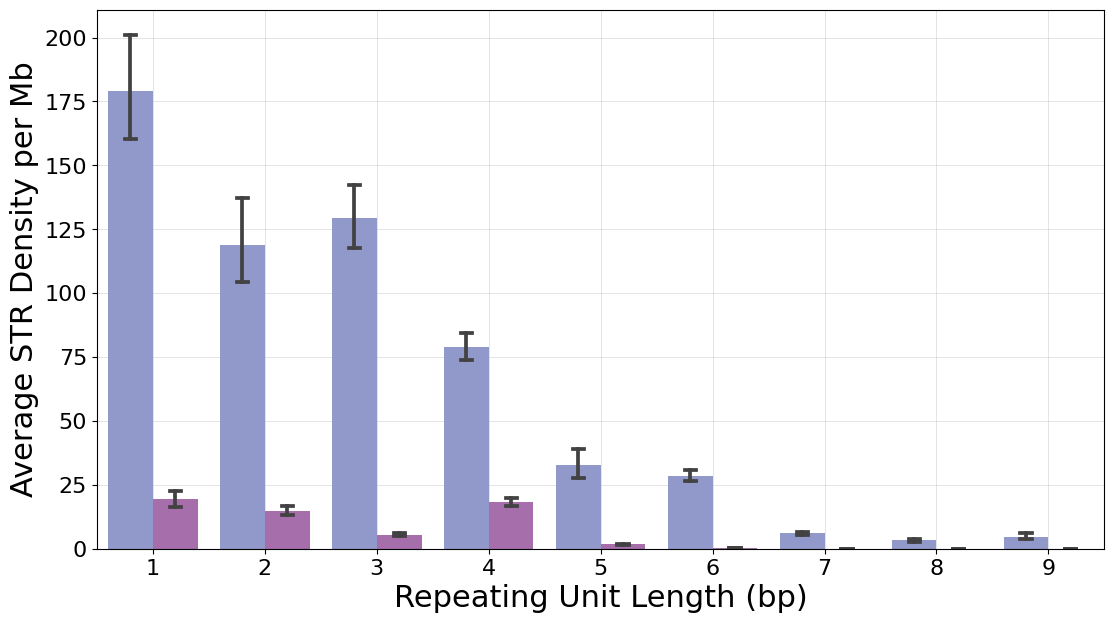

Bacteria


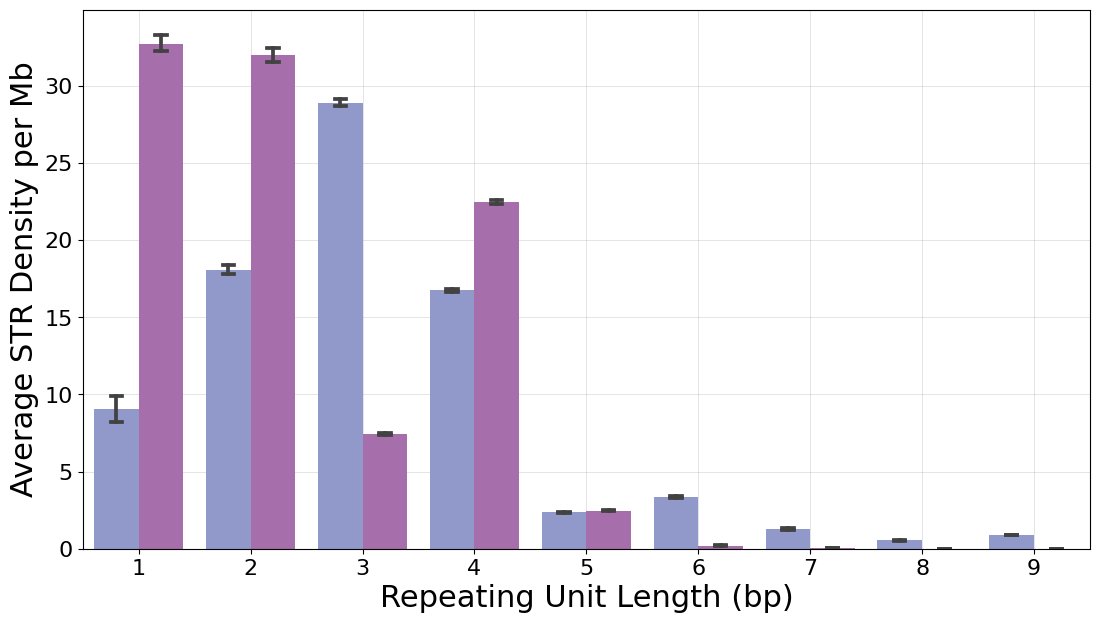

Archaea


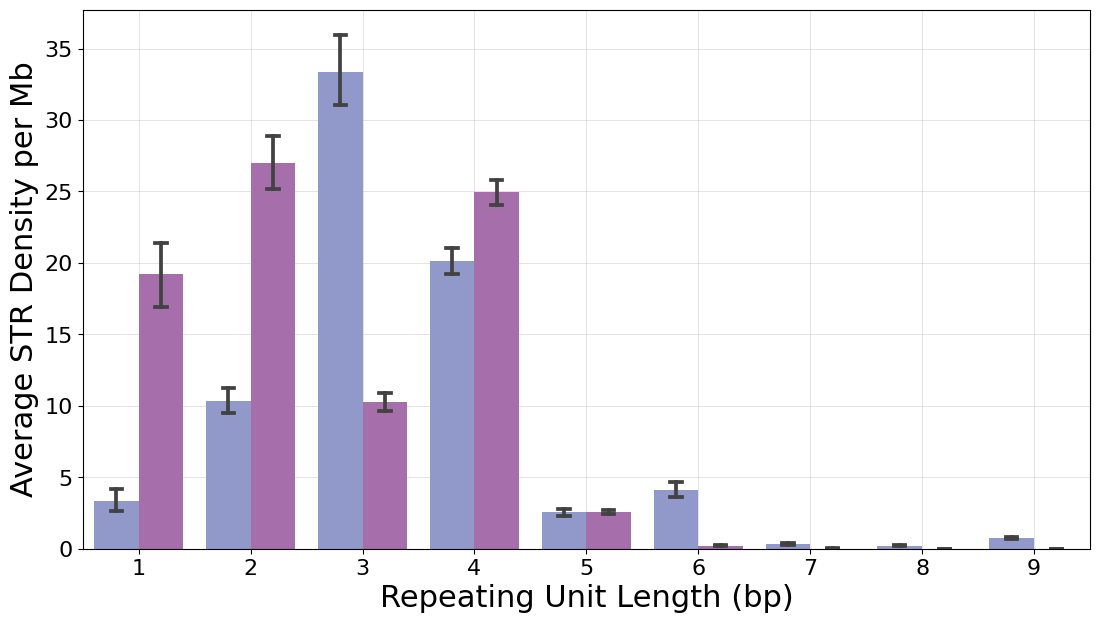

Viruses


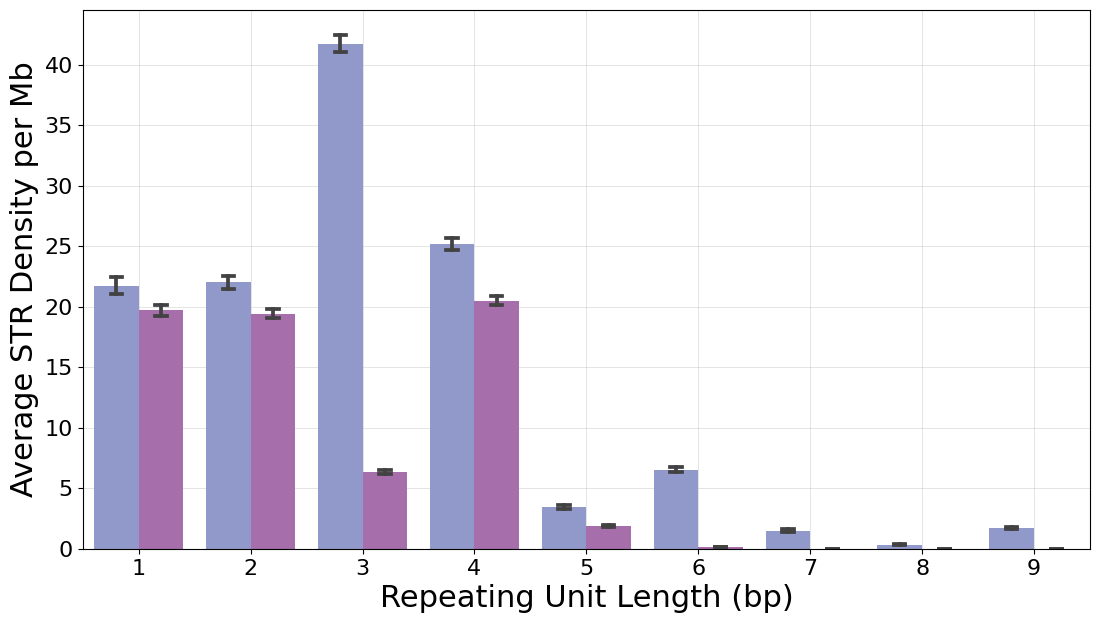

Plantae


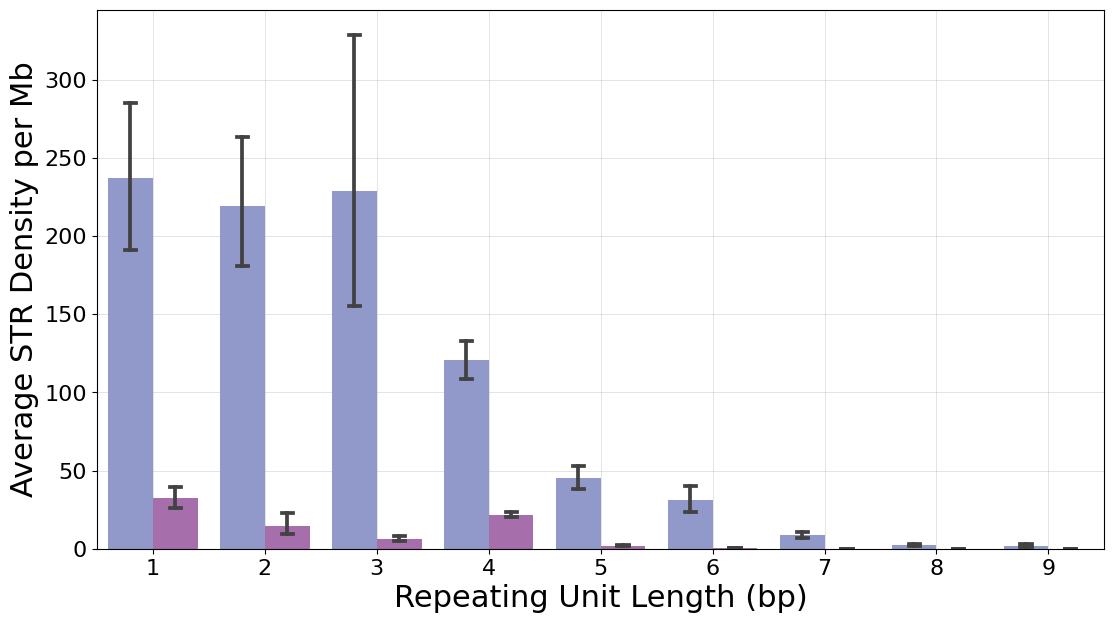

Fungi


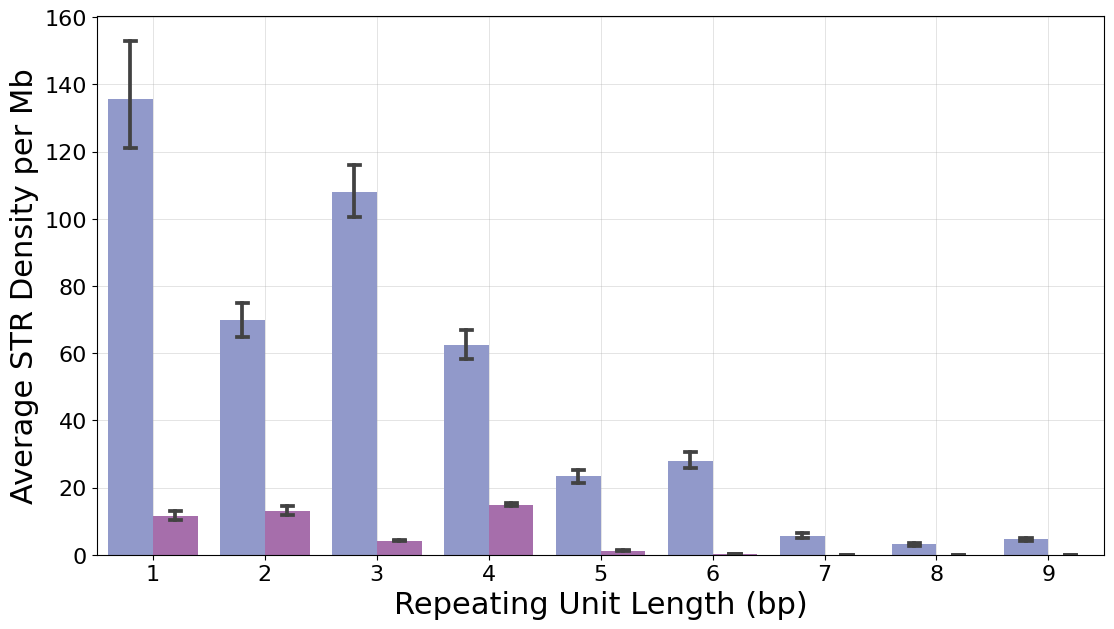

Animalia


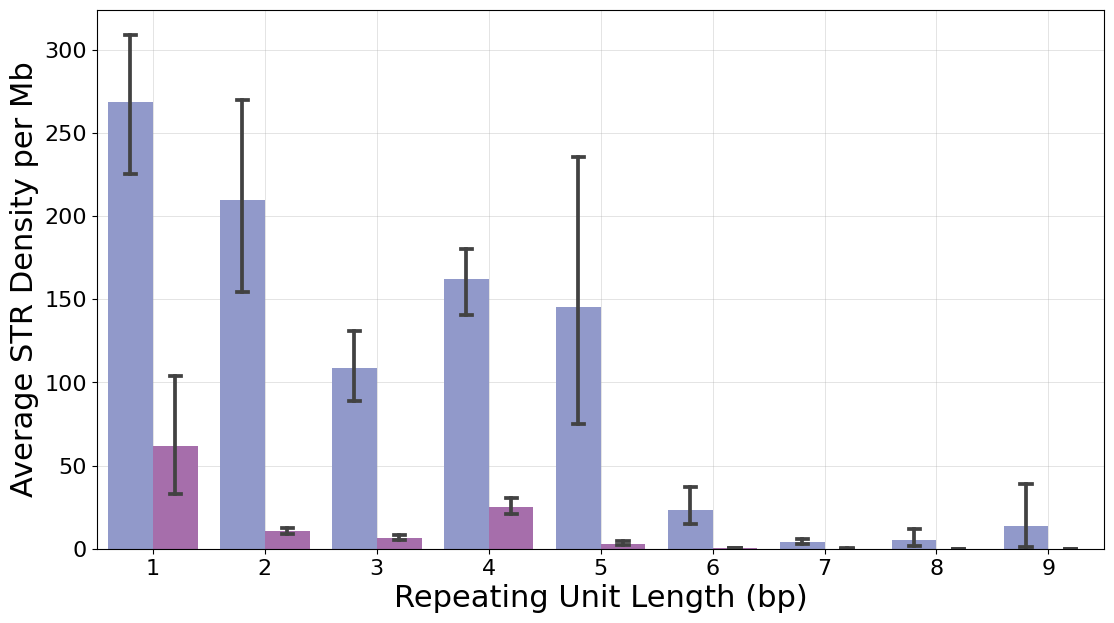

Protista


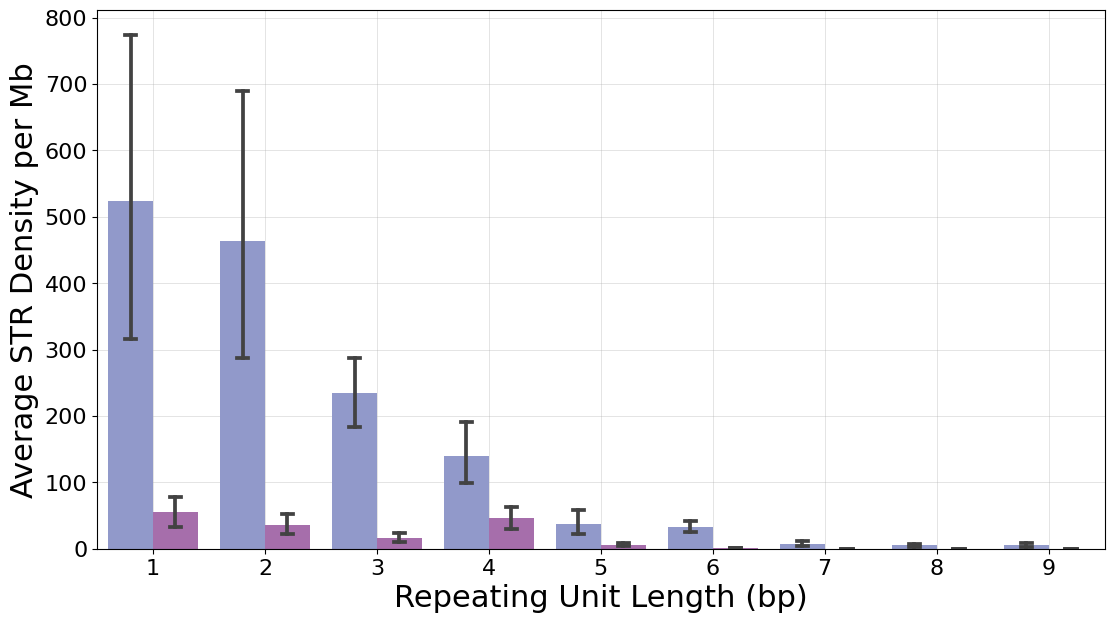

In [198]:
for taxonomic_level, category in [("superkingdom", "Eukaryota"), 
                                  ("superkingdom", "Bacteria"), 
                                  ("superkingdom", "Archaea"), 
                                  ("superkingdom", "Viruses"),
                                    ("kingdom", "Plantae"),
                                  ("kingdom", "Fungi"), 
                                  ("kingdom", "Animalia"), 
                                  ("kingdom", "Protista")
                                 ]:
    print(category)
    fig = plt.figure(figsize=(13, 7)) 
    ax = sns.barplot(x='sru', 
                     y="tandemDensity", 
                     # width=0.6, 
                     data=melted_densities.query(f"{taxonomic_level} == '{category}'"), 
                     hue="variable", 
                     hue_order=["Observed Density", "Expected Density"],
                     errorbar=('ci', 95),
                     
                     capsize = 0.1,
                     palette={"Observed Density": "#8792d4", 
                              "Expected Density": "#ae64b5"},
                     alpha=1.0)
    
    
    ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_axisbelow(True)
    ax.set_xlabel("Repeating Unit Length (bp)")
    
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.set_ylabel("Average STR Density per Mb")
    ax.xaxis.label.set_size(22)
    ax.legend(frameon=False, handles=[])
    plt.setp(legend.get_title(), fontsize=19)
    
    ax.yaxis.label.set_size(22)
    target = dest.joinpath("enrichment_simie")
    target.mkdir(exist_ok=True)
    fig.savefig(target.joinpath(f"expected_vs_observed_sru_decomposition_density_{category}.png"), bbox_inches='tight')
    plt.show()
    plt.close()



# Enrichment of Densities 

In [252]:
pivot_densities = joint_densities_sru.pivot(index="#assembly_accession", columns="sru", values="enrichmentCounts")
pivot_densities.columns = [f'sru_{col}' for col in pivot_densities]
pivot_densities = pivot_densities.fillna(0.0)
pivot_densities = pivot_densities.merge(kingdom_mapping, left_index=True, right_on="#assembly_accession").set_index("#assembly_accession")
pivot_densities

,sru_1,sru_2,sru_3,sru_4,sru_5,sru_6,sru_7,sru_8,sru_9,superkingdom,kingdom,phylum
#assembly_accession,,,,,,,,,,,,
GCA_000007325.1,-0.918750,0.139241,0.340659,-0.386503,-0.037037,0.333333,0.0,0.0,0.0,Bacteria,Eubacteria,Fusobacteriota
GCA_000007385.1,0.470588,-0.191554,0.510730,-0.166667,0.310345,0.966102,1.0,1.0,1.0,Bacteria,Eubacteria,Pseudomonadota
GCA_000008005.1,-0.906040,0.085714,0.454545,-0.216667,-0.333333,1.000000,1.0,0.0,1.0,Bacteria,Eubacteria,Bacillota
GCA_000008085.1,-1.000000,-0.200000,0.368421,-0.444444,-0.500000,0.000000,0.0,0.0,0.0,Archaea,Archaeabacteria,Nanoarchaeota
GCA_000008885.1,-0.122507,-0.015385,0.400000,0.175676,0.066667,0.500000,0.0,0.0,0.0,Bacteria,Eubacteria,Pseudomonadota
...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_963920465.1,-0.733333,-0.761905,0.827068,0.115044,0.500000,1.000000,1.0,0.0,1.0,Bacteria,Eubacteria,Cyanobacteriota
GCF_963920475.1,-0.523810,-0.772152,0.895692,-0.173333,0.066667,1.000000,0.0,0.0,1.0,Bacteria,Eubacteria,Cyanobacteriota
GCF_963920485.1,-0.652174,-0.909091,0.834921,0.033113,0.250000,1.000000,0.0,1.0,1.0,Bacteria,Eubacteria,Cyanobacteriota


In [311]:
pivot_densities_phylum = pivot_densities.groupby("phylum").agg({f"sru_{i}": "mean" for i in range(1, 10, 1)} | {"superkingdom": "first", "kingdom": "first"})\
                            .rename(columns={f"sru_{i}": i for i in range(1, 10, 1)})
pivot_densities_phylum

,1,2,3,4,5,6,7,8,9,superkingdom,kingdom
phylum,,,,,,,,,,,
Abditibacteriota,-0.846154,-0.072243,0.684211,-0.126761,0.176471,1.000000,1.000000,0.000000,1.000000,Bacteria,Eubacteria
Acidobacteriota,-0.644702,-0.409357,0.663860,-0.126083,-0.003593,0.866122,0.724561,0.568421,0.684211,Bacteria,Eubacteria
Actinomycetota,-0.767776,-0.690457,0.556591,-0.200915,-0.006435,0.920521,0.494857,0.589431,0.863724,Bacteria,Eubacteria
Apicomplexa,0.317213,0.655855,0.723114,0.246410,0.414122,0.903722,0.963838,0.992495,0.941000,Eukaryota,Protista
Aquificota,-0.955869,0.291813,0.507868,-0.123002,-0.026084,0.878431,0.058824,0.176471,0.058824,Bacteria,Eubacteria
...,...,...,...,...,...,...,...,...,...,...,...
Verrucomicrobiota,-0.683583,-0.091145,0.707696,0.003223,0.350022,0.895368,0.370886,0.221519,0.848101,Bacteria,Eubacteria
Vulcanimicrobiota,0.167421,0.016688,0.674477,-0.230620,-0.166969,0.862069,1.000000,0.500000,1.000000,Bacteria,Eubacteria
candidate division NC10,-0.555556,-0.270270,0.489362,-0.026316,0.750000,1.000000,1.000000,0.000000,0.000000,Bacteria,Eubacteria


In [312]:
pivot_densities_phylum['kingdom'] = pivot_densities_phylum['kingdom'].apply(lambda y: y if y in {"Fungi", "Eubacteria", "Archaeabacteria", "Protista", "Plantae", "Animalia"} else "Viruses")

In [313]:
pivot_densities_phylum['kingdom'].unique()

array(['Eubacteria', 'Protista', 'Animalia', 'Viruses', 'Fungi',
       'Archaeabacteria', 'Plantae'], dtype=object)

In [314]:
kingdom_color_palette = {
                          "Viruses": "#6bb5c7",
                         "Bacteria": "#0fbf2d",
                         "Archaea": "#b2b2ff",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                        "Eubacteria": "#0fbf2d",
                        "Animalia": "#9bba2d",
                        "Protista": "#c78f5b",
                          "Archaeabacteria": "#7b7bed",
                } 


In [315]:
domain_colors

{'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

In [316]:
domain_col = pivot_densities_phylum['superkingdom'].map(domain_colors)
kingdom_col = pivot_densities_phylum['kingdom'].map(kingdom_color_palette)

/tmp/ipykernel_985816/1640414351.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


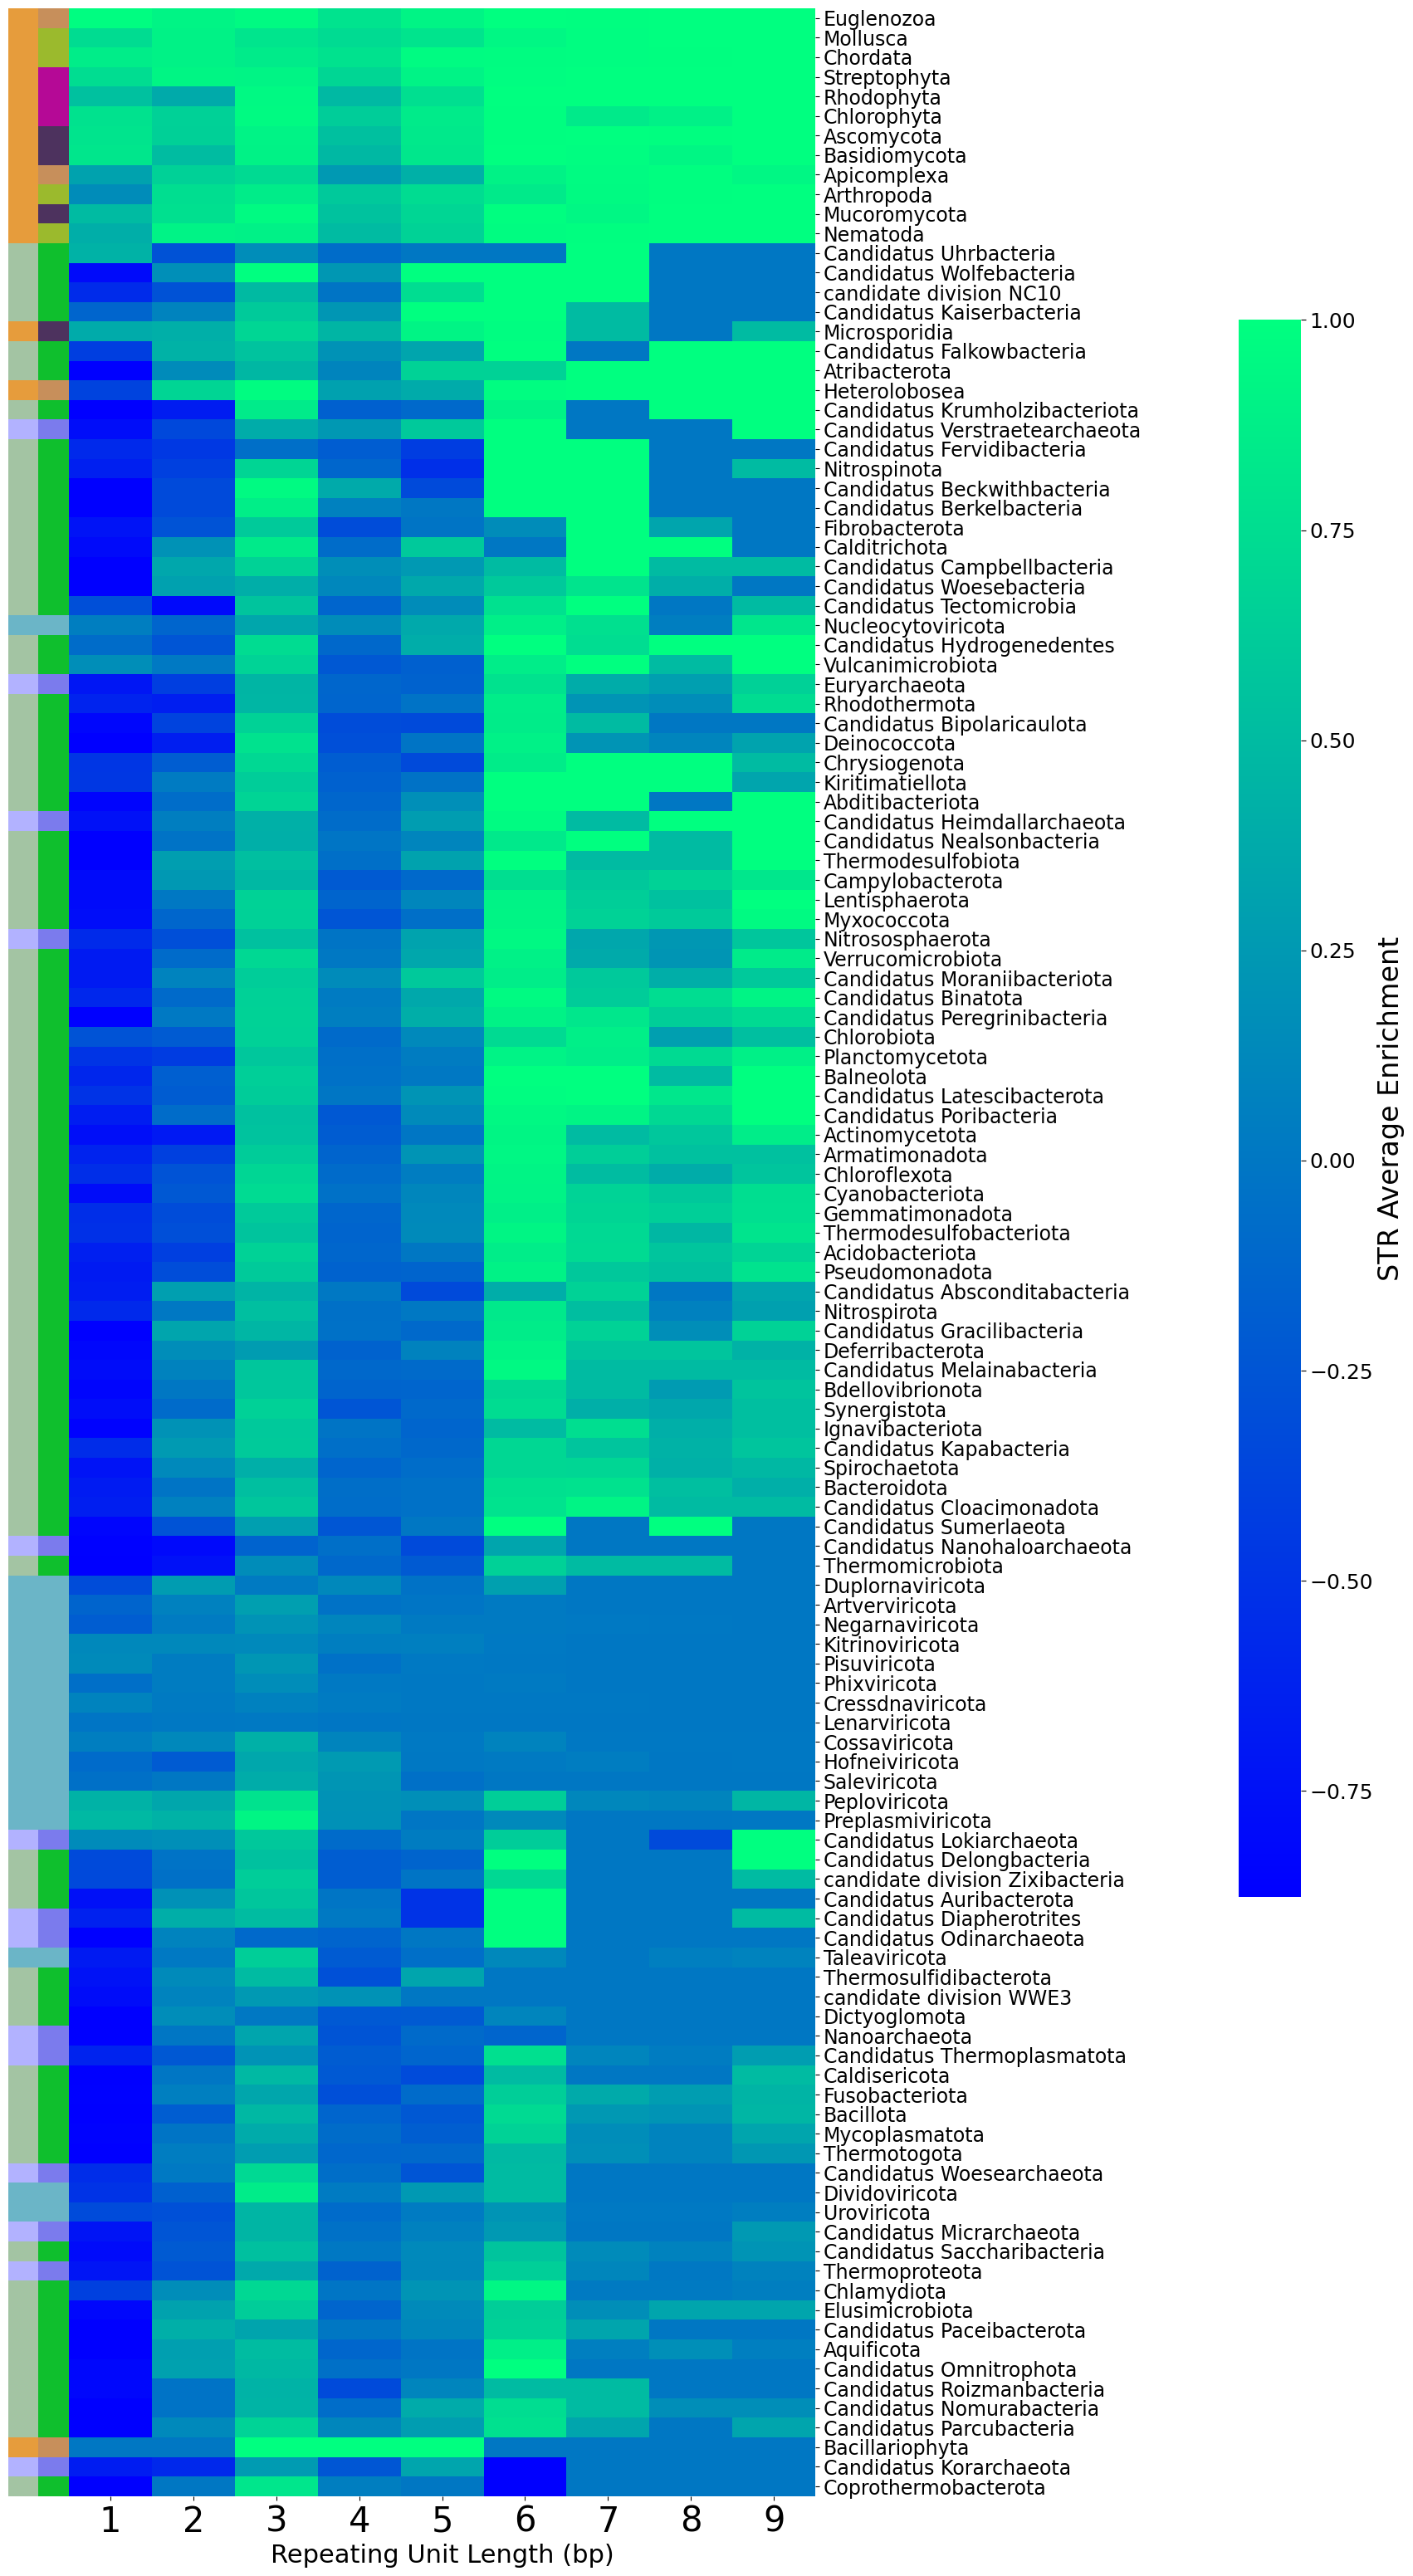

In [317]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
kws = dict(cbar_kws=dict(location="top", shrink=0.2))

figsize=(15, 38)

# .apply(lambda x: math.log(x+1, 10))
cmap = matplotlib.cm.get_cmap('viridis')
    
cg = sns.clustermap(
                  pivot_densities_phylum.drop(columns=['kingdom', 'superkingdom']),
                   row_colors=[domain_col, kingdom_col],
                   row_cluster=True, 
                   col_cluster=False,
                    method="average",
                    vmax=1.0,
                    cmap="winter",
                   figsize=figsize,
                   robust=True,
                   yticklabels=True, 
                   xticklabels=True,
                   cbar_kws={"shrink": 0.1, "orientation": "vertical"}
                   )
ax = cg.ax_heatmap
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_xlabel("Repeating Unit Length (bp)")
ax.set_ylabel("")
t = ax.xaxis.get_majorticklocs()
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(22)
ax.tick_params(axis="both", 
               which="major", 
               labelsize=17,
               rotation=0
              )
ax.tick_params(axis="x", 
               which="major", 
               labelsize=30,
               rotation=0
              )


x0, _y0, _w, _h = cg.cbar_pos
cg.ax_cbar.set_position([1.16, 0.2, 0.05, 0.5])
cg.ax_cbar.tick_params(axis='both', length=4, labelsize=18)


cg.cax.set_ylabel('STR Average Enrichment', size=24) #, labelpad=15, size=12)
for spine in cg.ax_cbar.spines:
    cg.ax_cbar.spines[spine].set_color('black')
    # cg.ax_cbar.spines[spine].set_linewidth(2)

target = dest.joinpath("enrichment_simie")
target.mkdir(exist_ok=True)
fig = plt.gcf()
fig.savefig(target.joinpath(f"clustermap_enrichment_simie_phylum.png"), bbox_inches='tight')
plt.show()